In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTENC
from sklearn.metrics import roc_auc_score

In [180]:
df = pd.read_csv('/content/drive/MyDrive/BFSI/Insurance_train.csv')

In [ ]:
df.head()

policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0   ID00001       0.515874        0.05             0.644231           C1   
1   ID00002       0.672619        0.02             0.375000           C2   
2   ID00003       0.841110        0.02             0.384615           C3   
3   ID00004       0.900277        0.11             0.432692           C4   
4   ID00005       0.596403        0.11             0.634615           C5   

   population_density  make segment model fuel_type     max_torque  \
0                4990     1       A    M1       CNG   60Nm@3500rpm   
1               27003     1       A    M1       CNG   60Nm@3500rpm   
2                4076     1       A    M1       CNG   60Nm@3500rpm   
3               21622     1      C1    M2    Petrol  113Nm@4400rpm   
4               34738     2       A    M3    Petrol   91Nm@4250rpm   

          max_power         engine_type  airbags is_esc  \
0  40.36bhp@6000rpm   F8D Petrol Engine        2     No   
1  40.36bhp@6000rpm   F8D Petrol Engine        2     No   
2  40.36bhp@6000rpm   F8D Petrol Engine        2     No   
3  88.50bhp@6000rpm  1.2 L K12N Dualjet        2    Yes   
4  67.06bhp@5500rpm             1.0 SCe        2     No   

  is_adjustable_steering is_tpms is_parking_sensors is_parking_camera  \
0                     No      No                Yes                No   
1                     No      No                Yes                No   
2                     No      No                Yes                No   
3                    Yes      No                Yes               Yes   
4                     No      No                 No               Yes   

  rear_brakes_type  displacement  cylinder transmission_type  gear_box  \
0             Drum           796         3            Manual         5   
1             Drum           796         3            Manual         5   
2             Drum           796         3            Manual         5   
3             Drum          1197         4         Automatic         5   
4             Drum           999         3         Automatic         5   

  steering_type  turning_radius  length  width  height  gross_weight  \
0         Power             4.6    3445   1515    1475          1185   
1         Power             4.6    3445   1515    1475          1185   
2         Power             4.6    3445   1515    1475          1185   
3      Electric             4.8    3995   1735    1515          1335   
4      Electric             5.0    3731   1579    1490          1155   

  is_front_fog_lights is_rear_window_wiper is_rear_window_washer  \
0                  No                   No                    No   
1                  No                   No                    No   
2                  No                   No                    No   
3                 Yes                   No                    No   
4                  No                   No                    No   

  is_rear_window_defogger is_brake_assist is_power_door_locks  \
0                      No              No                  No   
1                      No              No                  No   
2                      No              No                  No   
3                     Yes             Yes                 Yes   
4                      No              No                 Yes   

  is_central_locking is_power_steering is_driver_seat_height_adjustable  \
0                 No               Yes                               No   
1                 No               Yes                               No   
2                 No               Yes                               No   
3                Yes               Yes                              Yes   
4                Yes               Yes                               No   

  is_day_night_rear_view_mirror is_ecw is_speed_alert  ncap_rating  is_claim  
0                            No     No            Yes            0         0  
1                            No     No     

### EDA

In [ ]:
for column in df.columns:
  print(column)
  print(df[column].value_counts())

policy_id
ID00001    1
ID39053    1
ID39055    1
ID39056    1
ID39057    1
          ..
ID19535    1
ID19536    1
ID19537    1
ID19538    1
ID58592    1
Name: policy_id, Length: 58592, dtype: int64
policy_tenure
0.515874    1
1.011813    1
0.031010    1
0.272315    1
0.588006    1
           ..
1.153225    1
0.317849    1
1.128647    1
0.097815    1
0.124429    1
Name: policy_tenure, Length: 58592, dtype: int64
age_of_car
0.01    6362
0.00    5257
0.02    5189
0.03    4415
0.04    3763
0.05    3342
0.10    3123
0.06    3053
0.07    2888
0.08    2730
0.09    2643
0.12    2506
0.11    2442
0.13    2315
0.14    2151
0.15    1964
0.16    1291
0.17     931
0.18     738
0.19     458
0.20     287
0.21     172
0.22     148
0.23      90
0.24      65
0.25      46
0.30      32
0.27      29
0.31      26
0.28      25
0.26      24
0.29      21
0.32      13
0.33      12
0.36       8
0.34       6
0.39       5
0.38       4
1.00       3
0.37       3
0.49       2
0.46       2
0.44       2
0.42       1
0.

In [ ]:
df['policy_id'].nunique()

58592

In [ ]:
df['policy_tenure'].nunique()

58592

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [ ]:
df['age_of_car'].nunique()

49

In [ ]:
df['age_of_policyholder'].nunique()

75

In [ ]:
#check for missing values
df.isna().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

In [ ]:
#check for duplicates
df.duplicated().any()

False

In [ ]:
# Five number summary
df.describe()

policy_tenure    age_of_car  age_of_policyholder  population_density  \
count   58592.000000  58592.000000         58592.000000        58592.000000   
mean        0.611246      0.069424             0.469420        18826.858667   
std         0.414156      0.056721             0.122886        17660.174792   
min         0.002735      0.000000             0.288462          290.000000   
25%         0.210250      0.020000             0.365385         6112.000000   
50%         0.573792      0.060000             0.451923         8794.000000   
75%         1.039104      0.110000             0.548077        27003.000000   
max         1.396641      1.000000             1.000000        73430.000000   

               make       airbags  displacement      cylinder      gear_box  \
count  58592.000000  58592.000000  58592.000000  58592.000000  58592.000000   
mean       1.763722      3.137066   1162.355851      3.626963      5.245443   
std        1.136988      1.832641    266.304786      0.483616      0.430353   
min        1.000000      1.000000    796.000000      3.000000      5.000000   
25%        1.000000      2.000000    796.000000      3.000000      5.000000   
50%        1.000000      2.000000   1197.000000      4.000000      5.000000   
75%        3.000000      6.000000   1493.000000      4.000000      5.000000   
max        5.000000      6.000000   1498.000000      4.000000      6.000000   

       turning_radius        length         width       height  gross_weight  \
count    58592.000000  58592.000000  58592.000000  58592.00000  58592.000000   
mean         4.852893   3850.476891   1672.233667   1553.33537   1385.276813   
std          0.228061    311.457119    112.089135     79.62227    212.423085   
min          4.500000   3445.000000   1475.000000   1475.00000   1051.000000   
25%          4.600000   3445.000000   1515.000000   1475.00000   1185.000000   
50%          4.800000   3845.000000   1735.000000   1530.00000   1335.000000   
75%          5.000000   3995.000000   1755.000000   1635.00000   1510.000000   
max          5.200000   4300.000000   1811.000000   1825.00000   1720.000000   

        ncap_rating      is_claim  
count  58592.000000  58592.000000  
mean       1.759950      0.063968  
std        1.389576      0.244698  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        2.000000      0.000000  
75%        3.000000      0.000000  
max        5.000000      1.000000

In [ ]:
#target&independent variable
X = df.drop(['policy_id', 'is_claim'],axis=1)
y = df['is_claim']

In [ ]:
y.mean()

0.06396777717094485

In [ ]:
X.head()

age_of_car  age_of_policyholder area_cluster  population_density  make  \
0        0.05             0.644231           C1                4990     1   
1        0.02             0.375000           C2               27003     1   
2        0.02             0.384615           C3                4076     1   
3        0.11             0.432692           C4               21622     1   
4        0.11             0.634615           C5               34738     2   

  segment model fuel_type     max_torque         max_power  \
0       A    M1       CNG   60Nm@3500rpm  40.36bhp@6000rpm   
1       A    M1       CNG   60Nm@3500rpm  40.36bhp@6000rpm   
2       A    M1       CNG   60Nm@3500rpm  40.36bhp@6000rpm   
3      C1    M2    Petrol  113Nm@4400rpm  88.50bhp@6000rpm   
4       A    M3    Petrol   91Nm@4250rpm  67.06bhp@5500rpm   

          engine_type  airbags is_esc is_adjustable_steering is_tpms  \
0   F8D Petrol Engine        2     No                     No      No   
1   F8D Petrol Engine        2     No                     No      No   
2   F8D Petrol Engine        2     No                     No      No   
3  1.2 L K12N Dualjet        2    Yes                    Yes      No   
4             1.0 SCe        2     No                     No      No   

  is_parking_sensors is_parking_camera rear_brakes_type  displacement  \
0                Yes                No             Drum           796   
1                Yes                No             Drum           796   
2                Yes                No             Drum           796   
3                Yes               Yes             Drum          1197   
4                 No               Yes             Drum           999   

   cylinder transmission_type  gear_box steering_type  turning_radius  length  \
0         3            Manual         5         Power             4.6    3445   
1         3            Manual         5         Power             4.6    3445   
2         3            Manual         5         Power             4.6    3445   
3         4         Automatic         5      Electric             4.8    3995   
4         3         Automatic         5      Electric             5.0    3731   

   width  height  gross_weight is_front_fog_lights is_rear_window_wiper  \
0   1515    1475          1185                  No                   No   
1   1515    1475          1185                  No                   No   
2   1515    1475          1185                  No                   No   
3   1735    1515          1335                 Yes                   No   
4   1579    1490          1155                  No                   No   

  is_rear_window_washer is_rear_window_defogger is_brake_assist  \
0                    No                      No              No   
1                    No                      No              No   
2                    No                      No              No   
3                    No                     Yes             Yes   
4                    No                      No              No   

  is_power_door_locks is_central_locking is_power_steering  \
0                  No                 No               Yes   
1                  No                 No               Yes   
2                  No                 No               Yes   
3                 Yes                Yes               Yes   
4                 Yes                Yes               Yes   

  is_driver_seat_height_adjustable is_day_night_rear_view_mirror is_ecw  \
0                               No                            No     No   
1                               No                            No     No   
2                               No                            No     No   
3                              Yes                           Yes    Yes   
4                               No                           Yes    Yes   

  is_speed_alert  ncap_rating  
0            Yes            0  
1            Yes            0  
2            Yes            0  
3 

<h2> Pycaret

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 50.8 MB/s eta 0:00:00


In [ ]:
from pycaret.classification import *

In [ ]:
df.drop(['policy_tenure', 'policy_id'], axis=1, inplace=True)

In [ ]:
data = df.sample(frac=0.85, random_state=101)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (49803, 42)
Unseen Data For Predictions: (8789, 42)


In [ ]:
model = setup(data = data, target = 'is_claim', session_id=123, fix_imbalance=True)

In [ ]:
best = compare_models(exclude = ['ransac'])

Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [ ]:
gbc = create_model('gbc')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

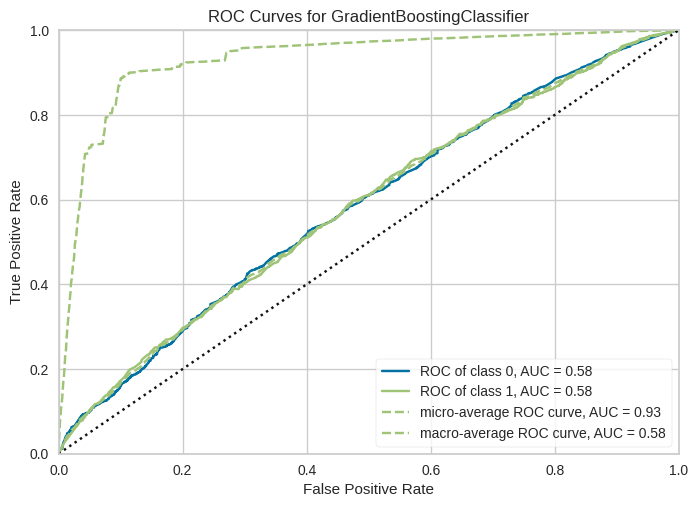

In [ ]:
plot_model(gbc)

In [ ]:
model = setup(data = data, target = 'is_claim', session_id=123, )

In [ ]:
best = compare_models(exclude = ['ransac'])

Processing:   0%|          | 0/61 [00:00<?, ?it/s]

<h2> H2O

In [ ]:
!pip uninstall scikit-learn
!pip install h2o
import h2o
from h2o.automl import H2OAutoML

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/scikit_learn-1.2.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.10/dist-packages/sklearn/*
Proceed (Y/n)? Y
  Successfully uninstalled scikit-learn-1.2.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 MB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.40.0.4-py2.py3-none-any.whl size=177697886 sha256=04c1077481708e9b621b9b51f41e3eb928cbe848806f692baf18ae22475d3044
  Stored in directory: /root/.cache/pip/wheels/43/f2/b0/5bb4d702a0467e82d77c45088db3eef25114c26b0eec8e7f6a
Successfully built h2o


In [ ]:
h2o.init(nthreads=-1)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.19" 2023-04-18; OpenJDK Runtime Environment (build 11.0.19+7-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.19+7-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp_9rat0uj
  JVM stdout: /tmp/tmp_9rat0uj/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp_9rat0uj/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         07 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.40.0.4
H2O_cluster_version_age:    2 months and 3 days
H2O_cluster_name:           H2O_from_python_unknownUser_zl8f9r
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [ ]:
train = h2o.import_file("/content/drive/MyDrive/BFSI/Insurance_train.csv")
test = h2o.import_file("/content/drive/MyDrive/BFSI/Insurance_train.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
train['is_claim'] = train['is_claim'].asfactor()

In [ ]:
train['is_claim']

is_claim
----------
         0
         0
         0
         0
         0
         0
         0
         0
         0
         0
[58592 rows x 1 column]

In [ ]:
train_as_df = h2o.as_list(train, use_pandas=True)

In [ ]:
train_as_df.drop(['policy_tenure', 'policy_id'], axis=1, inplace=True)

In [ ]:
train_as_df['is_claim'] = train_as_df['is_claim'].map({0: 'No', 1: 'yes'})

In [ ]:
train_as_df['is_claim']

0        No
1        No
2        No
3        No
4        No
         ..
58587    No
58588    No
58589    No
58590    No
58591    No
Name: is_claim, Length: 58592, dtype: object

In [ ]:
train = h2o.H2OFrame(train_as_df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
x = train.columns
y = "is_claim"
x.remove(y)

In [ ]:
aml = H2OAutoML(max_models=50, seed=1, stopping_metric='auc', balance_classes=True)
aml.train(x=x, y=y, training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_5_20230702_115223


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       12/50
# GBM base models (used / total)           5/15
# XGBoost base models (used / total)       5/18
# DRF base models (used / total)           0/2
# DeepLearning base models (used / total)  2/14
# GLM base models (used / total)           0/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.05789122998668856
RMSE: 0.24060596415444185
LogLoss: 0.2262345071263907
AUC: 0.666520238463415
AUCPR: 0.11891762688525095
Gini: 0.33304047692683003
Null degrees of freedom: 9955
Residual degrees of freedom: 9943
Null deviance: 4681.11138238449
Residual deviance: 4504.781505900692
AIC: 4530.781505900692

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.08379749259707968
       No    yes    Error    Rate
-----  ----  -----  -------  ---------------
No     7825  1504   0.1612   (1504.0/9329.0)
yes    408   219    0.6507   (408.0/627.0)
Total  8233  1723   0.192    (1912.0/9956.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.0837975    0.186383  129
max f2                       0.0638445    0.305452  216
max f0point5                 0.0876174    0.158222  113
max accuracy                 0.187721     0.936922  0
max precision                0.146051     0.466667  8
max recall                   0.0249491    1         383
max specificity              0.187721     0.999893  0
max absolute_mcc             0.0693857    0.123464  189
max min_per_class_accuracy   0.0666262    0.61563   202
max mean_per_class_accuracy  0.0638445    0.623171  216
max tns                      0.187721     9328      0
max fns                      0.187721     627       0
max fps                      0.0102549    9329      399
max tps                      0.0249491    627       383
max tnr                      0.187721     0.999893  0
max fnr                      0.187721     1         0
max fpr                      0.0102549    1         399
max tpr                      0.0249491    1         383

Gains/Lift Table: Avg response rate:  6.30 %, avg score:  6.41 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0101446                   0.136171           2.9871    2.9871             0.188119         0.143537   0.188119                    0.143537            0.030303        0.030303                   198.71    198.71             0.0215132
2        0.0202893                   0.130067           2.82988   2.90849            0.178218         0.132676   0.183168                    0.138107            0.0287081       0.0590112                  182.988   190.849            0.0413244
3        0.030233                    0.125519           2.56627   2.79593            0.161616         0.127336   0.17608                     0.134564            0.0255183       0.0845295                  156.627   179.593            0.0579457
4       

In [ ]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id                                                      auc    logloss      aucpr    mean_per_class_error      rmse        mse
-------------------------------------------------------  --------  ---------  ---------  ----------------------  --------  ---------
StackedEnsemble_AllModels_1_AutoML_5_20230702_115223     0.609841   0.233142  0.0957773                0.42213   0.243458  0.0592716
StackedEnsemble_BestOfFamily_1_AutoML_5_20230702_115223  0.609661   0.233222  0.0954435                0.425411  0.243487  0.0592857
GBM_grid_1_AutoML_5_20230702_115223_model_7              0.609322   0.233337  0.0955247                0.425094  0.243534  0.0593086
GBM_grid_1_AutoML_5_20230702_115223_model_2              0.608309   0.233307  0.0952687                0.424454  0.243503  0.0592936
GBM_grid_1_AutoML_5_20230702_115223_model_9              0.608094   0.233353  0.0956498                0.428916  0.243507  0.0592958
XGBoost_grid_1_AutoML_5_20230702_115223_model_9          0.607547   0.664318  0.0942489                0.430955  0.4858    0.236001
GBM_grid_1_AutoML_5_20230702_115223_model_6              0.607141   0.233631  0.094455                 0.422194  0.243577  0.0593296
XGBoost_grid_1_AutoML_5_20230702_115223_model_14         0.605504   0.663072  0.0944038                0.431699  0.485263  0.23548
GBM_grid_1_AutoML_5_20230702_115223_model_3              0.60491    0.233784  0.0944775                0.426513  0.243602  0.059342
GBM_5_AutoML_5_20230702_115223                           0.60328    0.234015  0.0942137                0.432299  0.243616  0.0593489
XGBoost_grid_1_AutoML_5_20230702_115223_model_13         0.600812   0.652095  0.0932542                0.429947  0.479913  0.230317
XGBoost_3_AutoML_5_20230702_115223                       0.596631   0.647796  0.0919712                0.436436  0.478458  0.228922
XGBoost_grid_1_AutoML_5_20230702_115223_model_6          0.596556   0.234982  0.0909537                0.43283   0.243982  0.0595271
GBM_2_AutoML_5_20230702_115223                           0.596219   0.235145  0.0926185                0.43175   0.243802  0.0594393
XGBoost_grid_1_AutoML_5_20230702_115223_model_12         0.591624   0.235758  0.0881338                0.446674  0.244238  0.0596522
GBM_3_AutoML_5_20230702_115223                           0.590879   0.236351  0.0913648                0.433269  0.243993  0.0595326
XRT_1_AutoML_5_20230702_115223                           0.590763   0.235576  0.0917662                0.437321  0.244069  0.0595696
DRF_1_AutoML_5_20230702_115223                           0.589789   0.235356  0.0887244                0.435672  0.244014  0.0595429
DeepLearning_grid_2_AutoML_5_20230702_115223_model_4     0.589217   0.236016  0.0888019                0.445325  0.244351  0.0597072
XGBoost_grid_1_AutoML_5_20230702_115223_model_8          0.588491   0.237055  0.0870765                0.435739  0.244683  0.0598696
DeepLearning_grid_1_AutoML_5_20230702_115223_model_4     0.585487   0.237066  0.0841678                0.437986  0.244467  0.0597643
XGBoost_grid_1_AutoML_5_20230702_115223_model_4          0.584717   0.236899  0.0869581                0.444092  0.244553  0.059806
DeepLearning_grid_1_AutoML_5_20230702_115223_model_1     0.584355   0.236093  0.0824449                0.439345  0.244287  0.059676
DeepLearning_1_AutoML_5_20230702_115223                  0.58372    0.236306  0.0860573                0.437288  0.244236  0.0596511
XGBoost_grid_1_AutoML_5_20230702_115223_model_1          0.579723   0.238484  0.0852377                0.444852  0.245032  0.0600406
DeepLearning_grid_3_AutoML_5_20230702_115223_model_4     0.579618   0.23797   0.0820011                0.441867  0.244644  0.0598509
XGBoost_grid_1_AutoML_5_20230702_115223_model_2          0.579608   0.239756  0.0833802                0.437824  0.2454    0.0602211
GBM_4_AutoML_5_20230702_115223                           0.579248   0.239905  0.0858128                0.44243   0.244594  0.0598261
GBM_grid_1_AutoML_

<h2> Model Building

EDA

In [ ]:
df.describe()

policy_tenure    age_of_car  age_of_policyholder  population_density  \
count   58592.000000  58592.000000         58592.000000        58592.000000   
mean        0.611246      0.069424             0.469420        18826.858667   
std         0.414156      0.056721             0.122886        17660.174792   
min         0.002735      0.000000             0.288462          290.000000   
25%         0.210250      0.020000             0.365385         6112.000000   
50%         0.573792      0.060000             0.451923         8794.000000   
75%         1.039104      0.110000             0.548077        27003.000000   
max         1.396641      1.000000             1.000000        73430.000000   

               make       airbags  displacement      cylinder      gear_box  \
count  58592.000000  58592.000000  58592.000000  58592.000000  58592.000000   
mean       1.763722      3.137066   1162.355851      3.626963      5.245443   
std        1.136988      1.832641    266.304786      0.483616      0.430353   
min        1.000000      1.000000    796.000000      3.000000      5.000000   
25%        1.000000      2.000000    796.000000      3.000000      5.000000   
50%        1.000000      2.000000   1197.000000      4.000000      5.000000   
75%        3.000000      6.000000   1493.000000      4.000000      5.000000   
max        5.000000      6.000000   1498.000000      4.000000      6.000000   

       turning_radius        length         width       height  gross_weight  \
count    58592.000000  58592.000000  58592.000000  58592.00000  58592.000000   
mean         4.852893   3850.476891   1672.233667   1553.33537   1385.276813   
std          0.228061    311.457119    112.089135     79.62227    212.423085   
min          4.500000   3445.000000   1475.000000   1475.00000   1051.000000   
25%          4.600000   3445.000000   1515.000000   1475.00000   1185.000000   
50%          4.800000   3845.000000   1735.000000   1530.00000   1335.000000   
75%          5.000000   3995.000000   1755.000000   1635.00000   1510.000000   
max          5.200000   4300.000000   1811.000000   1825.00000   1720.000000   

        ncap_rating      is_claim  
count  58592.000000  58592.000000  
mean       1.759950      0.063968  
std        1.389576      0.244698  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        2.000000      0.000000  
75%        3.000000      0.000000  
max        5.000000      1.000000

<Axes: >

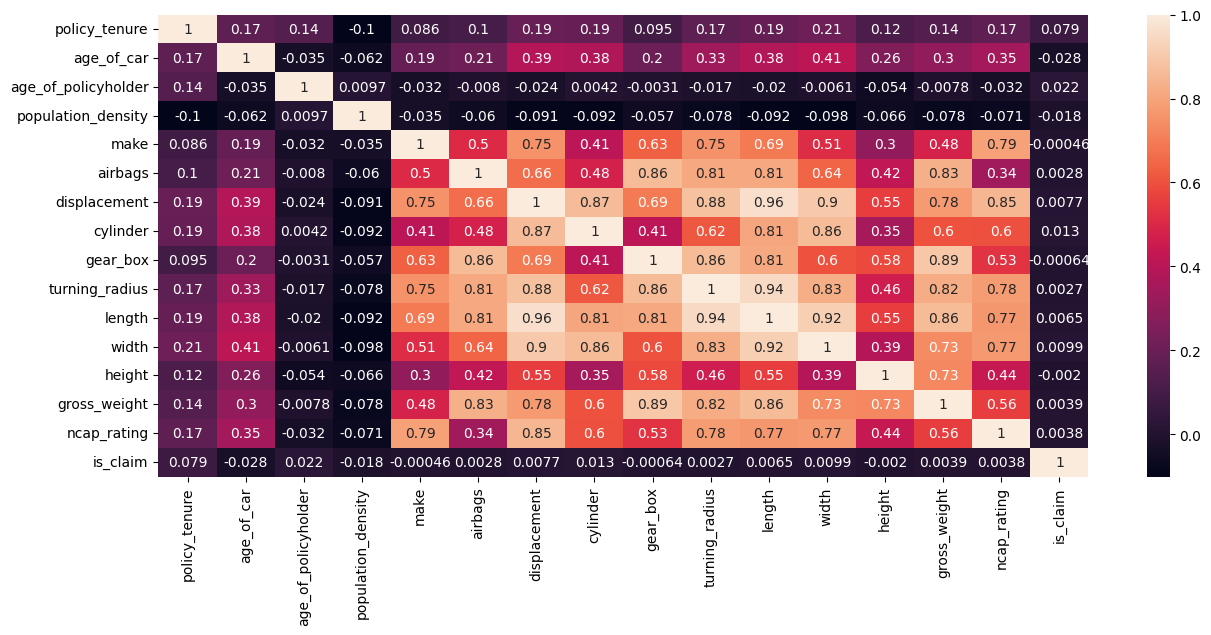

In [ ]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='is_claim', ylabel='count'>

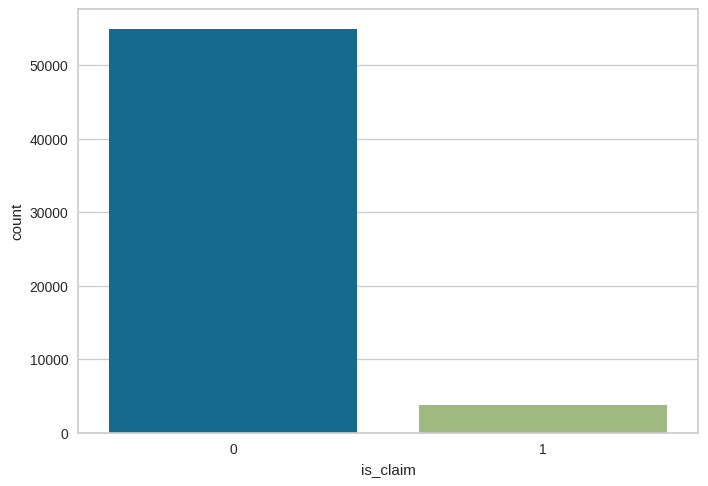

In [ ]:
sns.countplot(x='is_claim',data=df)

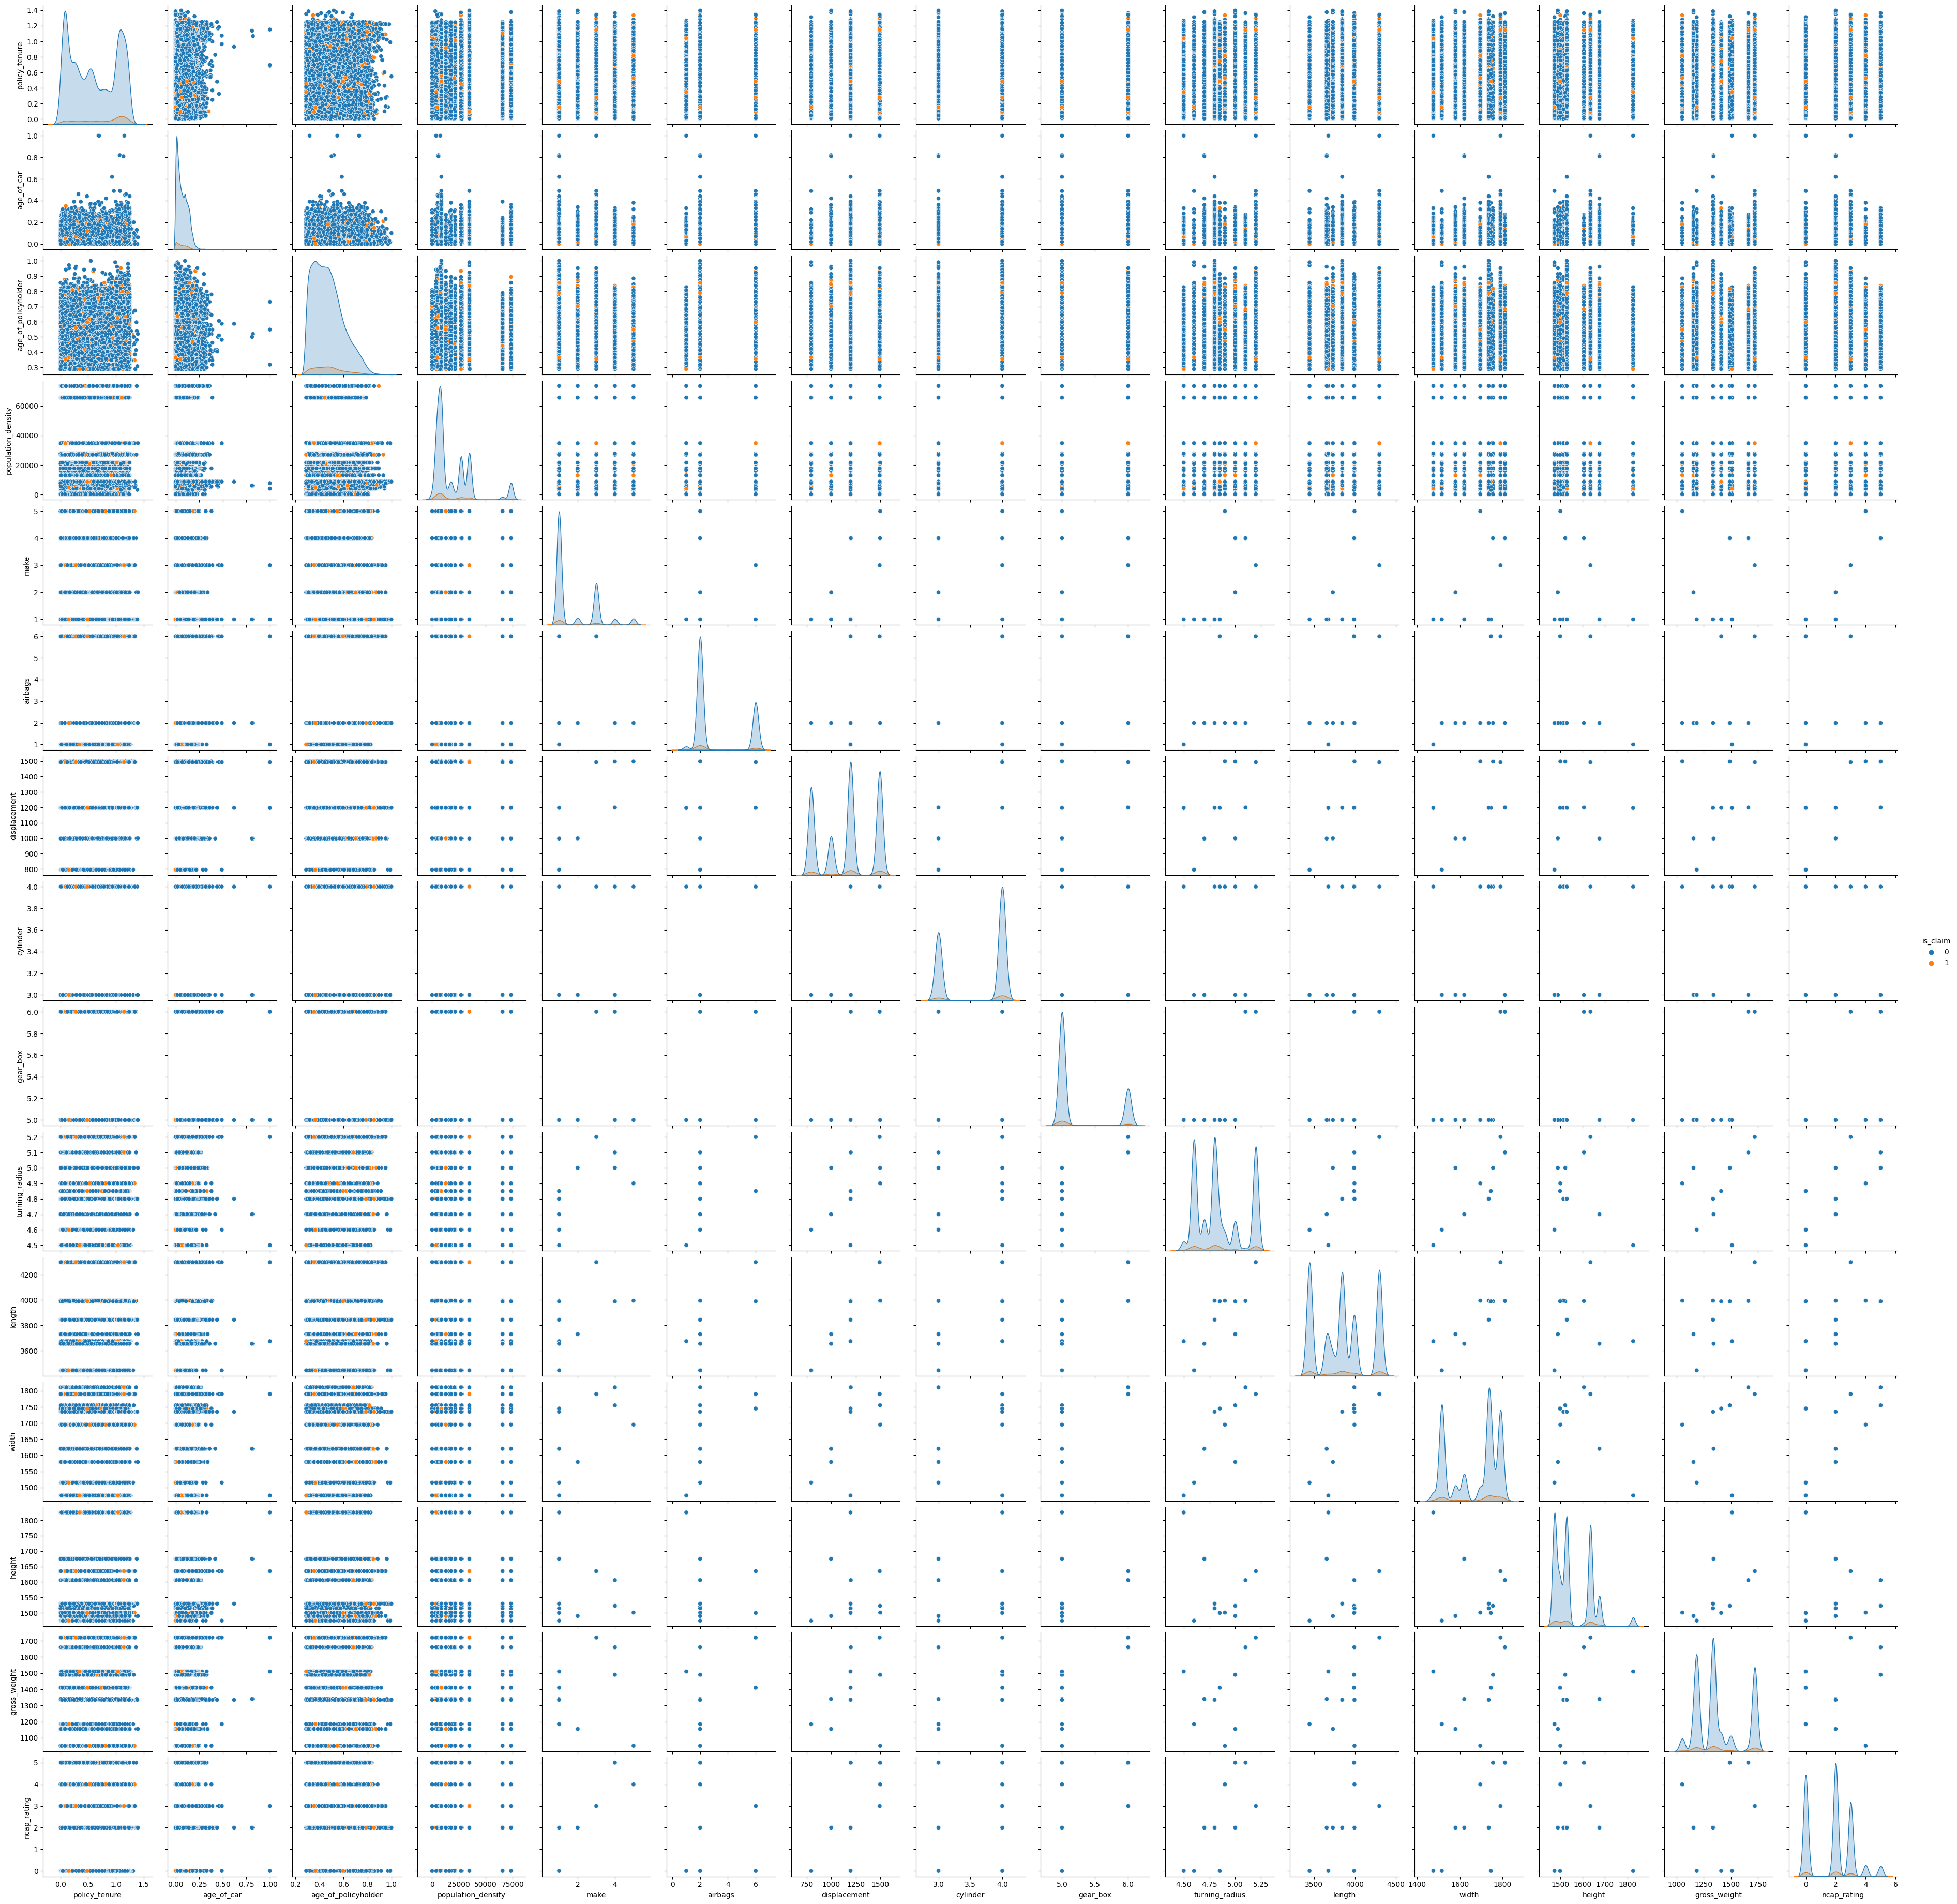

In [ ]:
sns.pairplot(df, hue='is_claim')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [ ]:
df['max_torque']

0         60Nm@3500rpm
1         60Nm@3500rpm
2         60Nm@3500rpm
3        113Nm@4400rpm
4         91Nm@4250rpm
             ...      
58587     91Nm@4250rpm
58588     60Nm@3500rpm
58589     60Nm@3500rpm
58590    113Nm@4400rpm
58591    250Nm@2750rpm
Name: max_torque, Length: 58592, dtype: object

In [ ]:
df['max_power']

0         40.36bhp@6000rpm
1         40.36bhp@6000rpm
2         40.36bhp@6000rpm
3         88.50bhp@6000rpm
4         67.06bhp@5500rpm
               ...        
58587     67.06bhp@5500rpm
58588     40.36bhp@6000rpm
58589     40.36bhp@6000rpm
58590     88.50bhp@6000rpm
58591    113.45bhp@4000rpm
Name: max_power, Length: 58592, dtype: object

In [84]:
def data_preprocessor(df):

    df["max_torque_Nm"] = df["max_torque"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*Nm)").astype('float64')
    df["max_torque_rpm"] = df["max_torque"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*rpm)").astype('float64')

    df["max_power_bhp"] = df["max_power"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*bhp)").astype('float64')
    df["max_power_rpm"] = df["max_power"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*rpm)").astype('float64')

    df.drop(["max_torque","max_power"],axis=1,inplace=True)

data_preprocessor(df)
df['volume'] = df['length'] * df['width'] * df['height']
df.drop(['length', 'width', 'height'], axis=1, inplace=True)

In [103]:
df.head()

policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0   ID00001       0.515874        0.05             0.644231           C1   
1   ID00002       0.672619        0.02             0.375000           C2   
2   ID00003       0.841110        0.02             0.384615           C3   
3   ID00004       0.900277        0.11             0.432692           C4   
4   ID00005       0.596403        0.11             0.634615           C5   

   population_density  make segment model fuel_type         engine_type  \
0                4990     1       A    M1       CNG   F8D Petrol Engine   
1               27003     1       A    M1       CNG   F8D Petrol Engine   
2                4076     1       A    M1       CNG   F8D Petrol Engine   
3               21622     1      C1    M2    Petrol  1.2 L K12N Dualjet   
4               34738     2       A    M3    Petrol             1.0 SCe   

   airbags is_esc is_adjustable_steering is_tpms is_parking_sensors  \
0        2     No                     No      No                Yes   
1        2     No                     No      No                Yes   
2        2     No                     No      No                Yes   
3        2    Yes                    Yes      No                Yes   
4        2     No                     No      No                 No   

  is_parking_camera rear_brakes_type  displacement  cylinder  \
0                No             Drum           796         3   
1                No             Drum           796         3   
2                No             Drum           796         3   
3               Yes             Drum          1197         4   
4               Yes             Drum           999         3   

  transmission_type  gear_box steering_type  turning_radius  length  width  \
0            Manual         5         Power             4.6    3445   1515   
1            Manual         5         Power             4.6    3445   1515   
2            Manual         5         Power             4.6    3445   1515   
3         Automatic         5      Electric             4.8    3995   1735   
4         Automatic         5      Electric             5.0    3731   1579   

   height  gross_weight is_front_fog_lights is_rear_window_wiper  \
0    1475          1185                  No                   No   
1    1475          1185                  No                   No   
2    1475          1185                  No                   No   
3    1515          1335                 Yes                   No   
4    1490          1155                  No                   No   

  is_rear_window_washer is_rear_window_defogger is_brake_assist  \
0                    No                      No              No   
1                    No                      No              No   
2                    No                      No              No   
3                    No                     Yes             Yes   
4                    No                      No              No   

  is_power_door_locks is_central_locking is_power_steering  \
0                  No                 No               Yes   
1                  No                 No               Yes   
2                  No                 No               Yes   
3                 Yes                Yes               Yes   
4                 Yes                Yes               Yes   

  is_driver_seat_height_adjustable is_day_night_rear_view_mirror is_ecw  \
0                               No                            No     No   
1                               No                            No     No   
2                               No                            No     No   
3                              Yes                           Yes    Yes   
4                               No                           Yes    Yes   

  is_speed_alert  ncap_rating  is_claim  max_torque_Nm  max_torque_rpm  \
0            Yes            0         0           60.0          3500.0   
1            Yes            0

In [104]:
df['volume'] = df['length'] * df['width'] * df['height']

In [106]:
df.drop(['length', 'width', 'height'], axis=1, inplace=True)

In [107]:
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.compose import ColumnTransformer,make_column_selector

In [108]:
oh=OneHotEncoder(drop='first',handle_unknown='ignore')

ct=ColumnTransformer([
    ('cat_encoder',oh,make_column_selector(dtype_include='object'))],remainder='passthrough',n_jobs=-1)

In [109]:
ct

ColumnTransformer(n_jobs=-1, remainder='passthrough',
                  transformers=[('cat_encoder',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f6a81bb18d0>)])

In [110]:
X=df.drop(['is_claim', 'policy_id'],axis=1)
y=df[['is_claim']]

In [111]:
np.array([df.columns.get_loc(c) for c in X.columns if X[c].dtype=='object'])

array([ 4,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17, 20, 22, 25, 26, 27, 28,
       29, 30, 31, 32, 33, 34, 35, 36])

In [112]:
cat_indices=np.array([df.columns.get_loc(c) for c in X.columns if X[c].dtype=='object'])

In [113]:
X = ct.fit_transform(X)

In [114]:
X

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.03600000e+01, 6.00000000e+03, 7.69828312e+09],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.03600000e+01, 6.00000000e+03, 7.69828312e+09],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.03600000e+01, 6.00000000e+03, 7.69828312e+09],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.03600000e+01, 6.00000000e+03, 7.69828312e+09],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        8.85000000e+01, 6.00000000e+03, 1.02067448e+10],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.13450000e+02, 4.00000000e+03, 1.25845950e+10]])

In [117]:
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek

In [128]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=101,stratify=y,)

In [162]:
sm = SMOTE(sampling_strategy="minority")
X_train_resample, y_train_resample = sm.fit_resample(X_train, y_train)

In [163]:
X_train_resample.shape,y_train_resample.shape

((93234, 86), (93234, 1))

In [164]:
from sklearn.linear_model import SGDClassifier,LogisticRegressionCV

from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier

In [165]:
clf_1 = LogisticRegressionCV(n_jobs=-1,cv=3,max_iter=3000)
clf_2 =SGDClassifier(max_iter=3000)

clf_3 = DecisionTreeClassifier()
clf_4 = ExtraTreeClassifier()

clf_5 = RandomForestClassifier(n_estimators=500,n_jobs=-1)
clf_6 = GradientBoostingClassifier(n_estimators=500)
clf_7= AdaBoostClassifier(base_estimator=RandomForestClassifier(n_jobs=-1),n_estimators=500)

clf_list=[clf_1,clf_2,clf_3,clf_4,clf_5,clf_6,clf_7]

In [166]:
def print_model_locations():
    print("-"*80)
    i=0
    for clf in clf_list:
        print(f"{clf.__class__.__name__:30} at index {i}")
        print("-"*80)
        i+=1

print_model_locations()

--------------------------------------------------------------------------------
LogisticRegressionCV           at index 0
--------------------------------------------------------------------------------
SGDClassifier                  at index 1
--------------------------------------------------------------------------------
DecisionTreeClassifier         at index 2
--------------------------------------------------------------------------------
ExtraTreeClassifier            at index 3
--------------------------------------------------------------------------------
RandomForestClassifier         at index 4
--------------------------------------------------------------------------------
GradientBoostingClassifier     at index 5
--------------------------------------------------------------------------------
AdaBoostClassifier             at index 6
--------------------------------------------------------------------------------


In [167]:
%%time
print("-"*40)
for clf in clf_list:
    clf.fit(X_train_resample,y_train_resample.values.ravel())
    print("Fitting",clf.__class__.__name__,"done")
    print('-'*80)

----------------------------------------
Fitting LogisticRegressionCV done
--------------------------------------------------------------------------------
Fitting SGDClassifier done
--------------------------------------------------------------------------------
Fitting DecisionTreeClassifier done
--------------------------------------------------------------------------------
Fitting ExtraTreeClassifier done
--------------------------------------------------------------------------------
Fitting RandomForestClassifier done
--------------------------------------------------------------------------------
Fitting GradientBoostingClassifier done
--------------------------------------------------------------------------------
Fitting AdaBoostClassifier done
--------------------------------------------------------------------------------
CPU times: user 9min 44s, sys: 1.77 s, total: 9min 46s
Wall time: 8min 24s


In [168]:
from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay

--------------------------------------------------------------------------------
LogisticRegressionCV
              precision    recall  f1-score   support

           0       0.94      0.39      0.55      8227
           1       0.07      0.62      0.12       562

    accuracy                           0.41      8789
   macro avg       0.50      0.51      0.33      8789
weighted avg       0.88      0.41      0.52      8789

--------------------------------------------------------------------------------
SGDClassifier
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      8227
           1       0.06      1.00      0.12       562

    accuracy                           0.06      8789
   macro avg       0.03      0.50      0.06      8789
weighted avg       0.00      0.06      0.01      8789

--------------------------------------------------------------------------------
DecisionTreeClassifier
              precision    recall  f1-score  

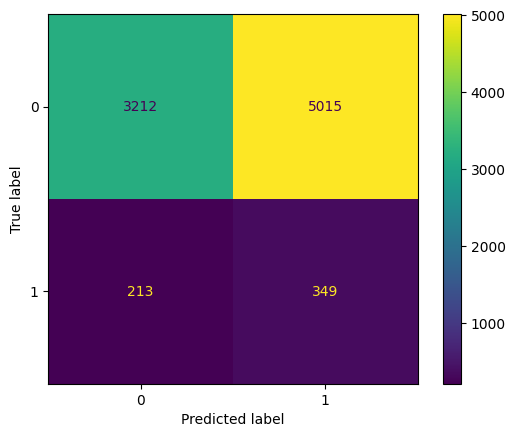

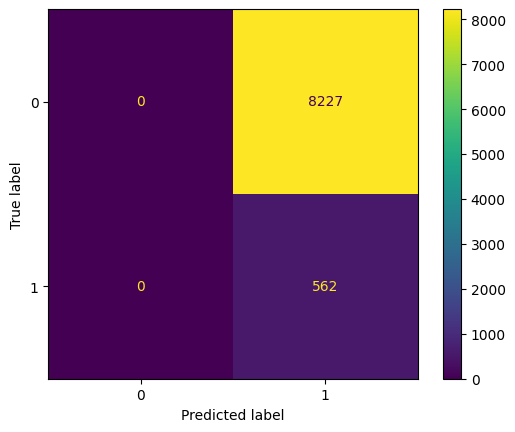

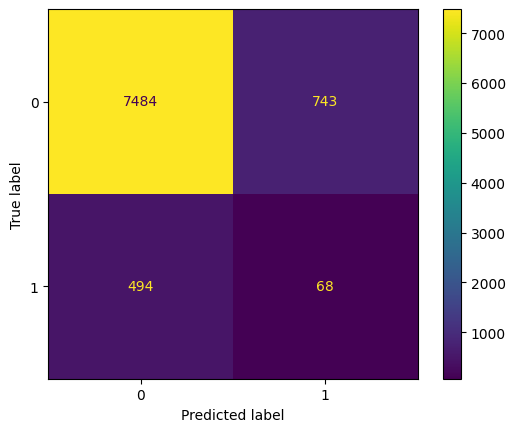

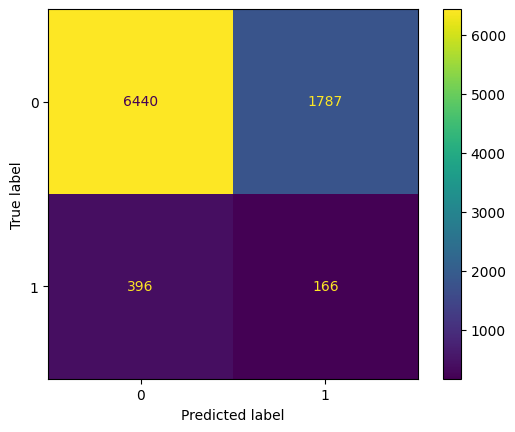

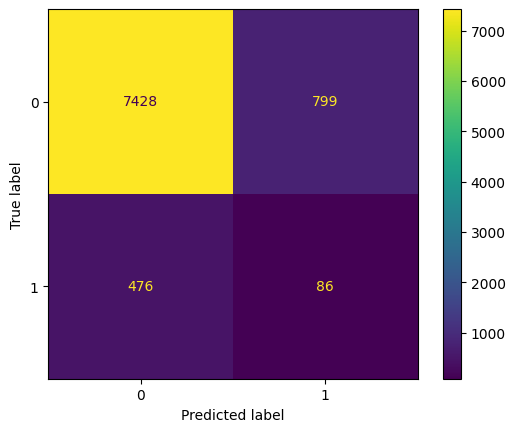

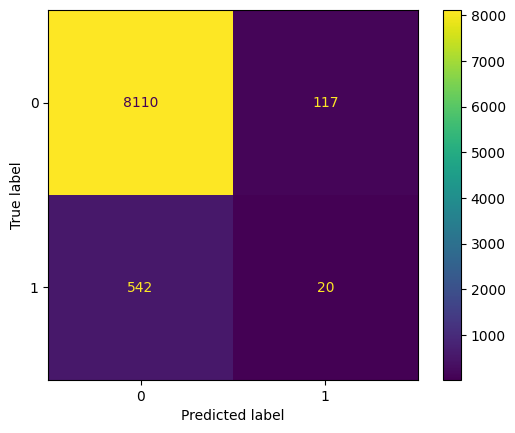

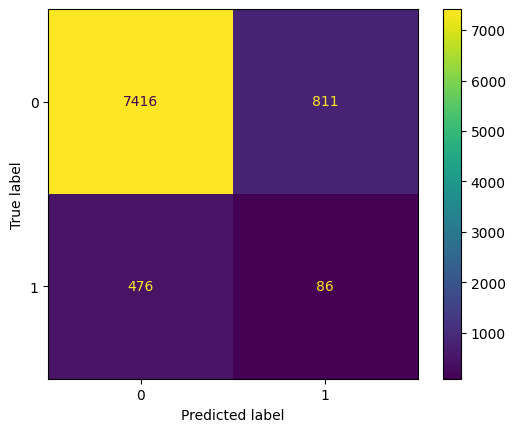

In [169]:
score_dict={}

for clf in clf_list:

    clf_name=(clf.__class__.__name__)
    pred=clf.predict(X_test)

    print("-"*80)
    print(clf_name)
    print(classification_report(y_test.values,pred))
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

    score_dict[clf_name]={
        'roc_auc_score':roc_auc_score(y_test.values,pred)
    }

print("-"*40)

In [170]:
score_pd=pd.DataFrame(score_dict).transpose().sort_values('roc_auc_score',ascending=False)
score_pd

roc_auc_score
ExtraTreeClassifier              0.539081
RandomForestClassifier           0.527953
AdaBoostClassifier               0.527224
DecisionTreeClassifier           0.515342
GradientBoostingClassifier       0.510683
LogisticRegressionCV             0.505709
SGDClassifier                    0.500000

<Axes: ylabel='roc_auc_score'>

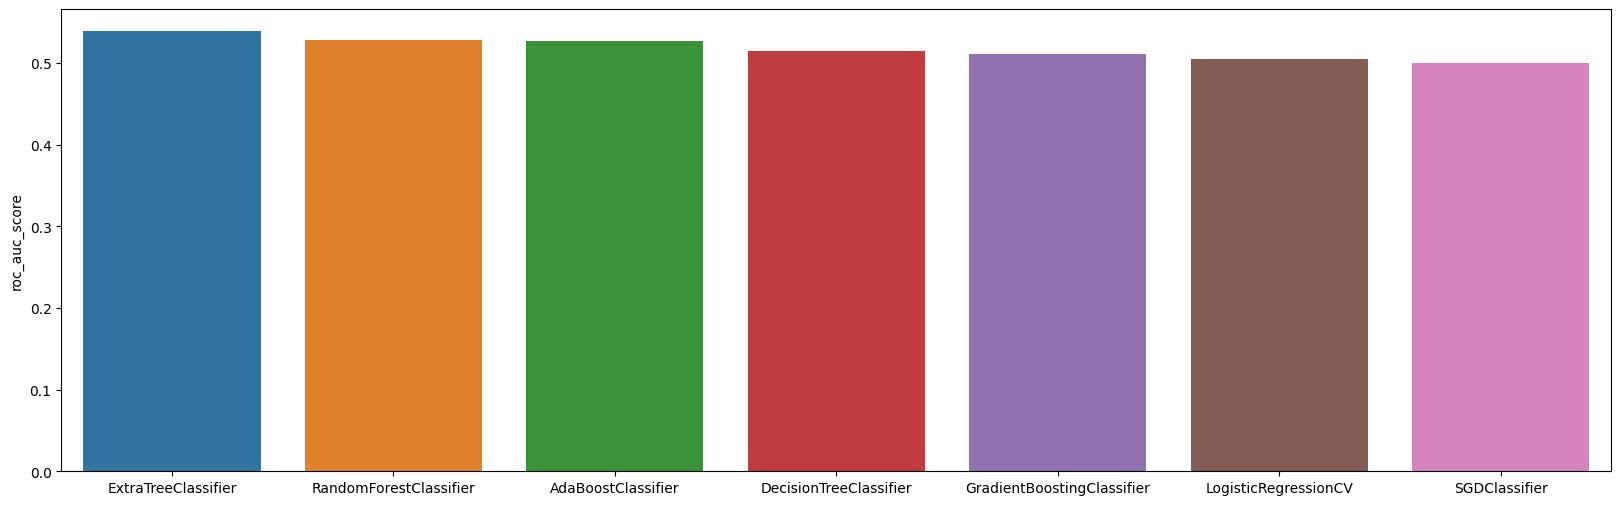

In [171]:
plt.figure(figsize=(20,6))
sns.barplot(y=score_pd['roc_auc_score'],x=score_pd.index)

<h3> Split features into Numerical and Categorical

In [181]:
df.head()

policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0   ID00001       0.515874        0.05             0.644231           C1   
1   ID00002       0.672619        0.02             0.375000           C2   
2   ID00003       0.841110        0.02             0.384615           C3   
3   ID00004       0.900277        0.11             0.432692           C4   
4   ID00005       0.596403        0.11             0.634615           C5   

   population_density  make segment model fuel_type     max_torque  \
0                4990     1       A    M1       CNG   60Nm@3500rpm   
1               27003     1       A    M1       CNG   60Nm@3500rpm   
2                4076     1       A    M1       CNG   60Nm@3500rpm   
3               21622     1      C1    M2    Petrol  113Nm@4400rpm   
4               34738     2       A    M3    Petrol   91Nm@4250rpm   

          max_power         engine_type  airbags is_esc  \
0  40.36bhp@6000rpm   F8D Petrol Engine        2     No   
1  40.36bhp@6000rpm   F8D Petrol Engine        2     No   
2  40.36bhp@6000rpm   F8D Petrol Engine        2     No   
3  88.50bhp@6000rpm  1.2 L K12N Dualjet        2    Yes   
4  67.06bhp@5500rpm             1.0 SCe        2     No   

  is_adjustable_steering is_tpms is_parking_sensors is_parking_camera  \
0                     No      No                Yes                No   
1                     No      No                Yes                No   
2                     No      No                Yes                No   
3                    Yes      No                Yes               Yes   
4                     No      No                 No               Yes   

  rear_brakes_type  displacement  cylinder transmission_type  gear_box  \
0             Drum           796         3            Manual         5   
1             Drum           796         3            Manual         5   
2             Drum           796         3            Manual         5   
3             Drum          1197         4         Automatic         5   
4             Drum           999         3         Automatic         5   

  steering_type  turning_radius  length  width  height  gross_weight  \
0         Power             4.6    3445   1515    1475          1185   
1         Power             4.6    3445   1515    1475          1185   
2         Power             4.6    3445   1515    1475          1185   
3      Electric             4.8    3995   1735    1515          1335   
4      Electric             5.0    3731   1579    1490          1155   

  is_front_fog_lights is_rear_window_wiper is_rear_window_washer  \
0                  No                   No                    No   
1                  No                   No                    No   
2                  No                   No                    No   
3                 Yes                   No                    No   
4                  No                   No                    No   

  is_rear_window_defogger is_brake_assist is_power_door_locks  \
0                      No              No                  No   
1                      No              No                  No   
2                      No              No                  No   
3                     Yes             Yes                 Yes   
4                      No              No                 Yes   

  is_central_locking is_power_steering is_driver_seat_height_adjustable  \
0                 No               Yes                               No   
1                 No               Yes                               No   
2                 No               Yes                               No   
3                Yes               Yes                              Yes   
4                Yes               Yes                               No   

  is_day_night_rear_view_mirror is_ecw is_speed_alert  ncap_rating  is_claim  
0                            No     No            Yes            0         0  
1                            No     No     

In [182]:
def data_preprocessor(df):

    df["max_torque_Nm"] = df["max_torque"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*Nm)").astype('float64')
    df["max_torque_rpm"] = df["max_torque"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*rpm)").astype('float64')

    df["max_power_bhp"] = df["max_power"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*bhp)").astype('float64')
    df["max_power_rpm"] = df["max_power"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*rpm)").astype('float64')

    df.drop(["max_torque","max_power"],axis=1,inplace=True)

data_preprocessor(df)
df['volume'] = df['length'] * df['width'] * df['height']
df.drop(['length', 'width', 'height'], axis=1, inplace=True)
char['make']=char['make'].astype('object')
char['airbags']=char['airbags'].astype('object')
char['displacement']=char['displacement'].astype('object')
char['cylinder']=char['cylinder'].astype('object')
char['gear_box']=char['gear_box'].astype('object')
char['turning_radius']=char['turning_radius'].astype('object')
char['gross_weight']=char['gross_weight'].astype('object')
char['ncap_rating']=char['ncap_rating'].astype('object')
char['max_torque_Nm']=char['max_torque_Nm'].astype('object')
char['max_torque_rpm']=char['max_torque_rpm'].astype('object')
char['max_power_bhp']=char['max_power_bhp'].astype('object')
char['max_power_rpm']=char['max_power_rpm'].astype('object')
char['volume']=char['volume'].astype('object')

In [183]:
#target&independent variable
X = df.drop(['policy_id', 'is_claim'],axis=1)
y = df['is_claim']

In [184]:
num = X.select_dtypes(include='number')
char = X.select_dtypes(include='object')

In [185]:
def unique_counts(var):
    counts = var.value_counts().count()
    return counts
unique_df = pd.DataFrame(num.apply(lambda x:unique_counts(x)))
unique_df

0
policy_tenure        58592
age_of_car              49
age_of_policyholder     75
population_density      22
make                     5
airbags                  3
displacement             9
cylinder                 2
gear_box                 2
turning_radius           9
gross_weight            10
ncap_rating              5
max_torque_Nm            8
max_torque_rpm           8
max_power_bhp            9
max_power_rpm            5
volume                  11

In [186]:
#dropping features with zero variance
from sklearn.feature_selection import VarianceThreshold
varselector= VarianceThreshold(threshold=0)
varselector.fit_transform(num)
cols = varselector.get_support(indices=True)
num_1 = num.iloc[:,cols]

In [187]:
unique_df = pd.DataFrame(num_1.apply(lambda x:unique_counts(x)), columns=['count'])
unique_df

count
policy_tenure        58592
age_of_car              49
age_of_policyholder     75
population_density      22
make                     5
airbags                  3
displacement             9
cylinder                 2
gear_box                 2
turning_radius           9
gross_weight            10
ncap_rating              5
max_torque_Nm            8
max_torque_rpm           8
max_power_bhp            9
max_power_rpm            5
volume                  11

In [188]:
slice1 = unique_df[unique_df['count']<=20]
cat_list = slice1.index
cat = num.loc[:,cat_list]
cat.dtypes

make                int64
airbags             int64
displacement        int64
cylinder            int64
gear_box            int64
turning_radius    float64
gross_weight        int64
ncap_rating         int64
max_torque_Nm     float64
max_torque_rpm    float64
max_power_bhp     float64
max_power_rpm     float64
volume              int64
dtype: object

In [189]:
slice2 = unique_df[unique_df['count']>20]
num_list=slice2.index
num=num.loc[:,num_list]
num.dtypes

policy_tenure          float64
age_of_car             float64
age_of_policyholder    float64
population_density       int64
dtype: object

In [190]:
char=pd.concat([char,cat],axis=1,join="inner")
char.head()

area_cluster segment model fuel_type         engine_type is_esc  \
0           C1       A    M1       CNG   F8D Petrol Engine     No   
1           C2       A    M1       CNG   F8D Petrol Engine     No   
2           C3       A    M1       CNG   F8D Petrol Engine     No   
3           C4      C1    M2    Petrol  1.2 L K12N Dualjet    Yes   
4           C5       A    M3    Petrol             1.0 SCe     No   

  is_adjustable_steering is_tpms is_parking_sensors is_parking_camera  \
0                     No      No                Yes                No   
1                     No      No                Yes                No   
2                     No      No                Yes                No   
3                    Yes      No                Yes               Yes   
4                     No      No                 No               Yes   

  rear_brakes_type transmission_type steering_type is_front_fog_lights  \
0             Drum            Manual         Power                  No   
1             Drum            Manual         Power                  No   
2             Drum            Manual         Power                  No   
3             Drum         Automatic      Electric                 Yes   
4             Drum         Automatic      Electric                  No   

  is_rear_window_wiper is_rear_window_washer is_rear_window_defogger  \
0                   No                    No                      No   
1                   No                    No                      No   
2                   No                    No                      No   
3                   No                    No                     Yes   
4                   No                    No                      No   

  is_brake_assist is_power_door_locks is_central_locking is_power_steering  \
0              No                  No                 No               Yes   
1              No                  No                 No               Yes   
2              No                  No                 No               Yes   
3             Yes                 Yes                Yes               Yes   
4              No                 Yes                Yes               Yes   

  is_driver_seat_height_adjustable is_day_night_rear_view_mirror is_ecw  \
0                               No                            No     No   
1                               No                            No     No   
2                               No                            No     No   
3                              Yes                           Yes    Yes   
4                               No                           Yes    Yes   

  is_speed_alert  make  airbags  displacement  cylinder  gear_box  \
0            Yes     1        2           796         3         5   
1            Yes     1        2           796         3         5   
2            Yes     1        2           796         3         5   
3            Yes     1        2          1197         4         5   
4            Yes     2        2           999         3         5   

   turning_radius  gross_weight  ncap_rating  max_torque_Nm  max_torque_rpm  \
0             4.6          1185            0           60.0          3500.0   
1             4.6          1185            0           60.0          3500.0   
2             4.6          1185            0           60.0          3500.0   
3             4.8          1335            2          113.0          4400.0   
4             5.0          1155            2           91.0          4250.0   

   max_power_bhp  max_power_rpm       volume  
0          40.36         6000.0   7698283125  
1          40.36         6000.0   7698283125  
2          40.36         6000.0   7698283125  
3          88.50         6000.0  10500957375  
4          67.06         5500.0   8777961010

<h3> Outlier Analysis of Numerical Features

In [191]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.88,0.9,0.95,0.99])

policy_tenure    age_of_car  age_of_policyholder  population_density
count   58592.000000  58592.000000         58592.000000        58592.000000
mean        0.611246      0.069424             0.469420        18826.858667
std         0.414156      0.056721             0.122886        17660.174792
min         0.002735      0.000000             0.288462          290.000000
1%          0.010019      0.000000             0.288462          290.000000
5%          0.042945      0.000000             0.298077         4076.000000
10%         0.081874      0.010000             0.317308         4076.000000
25%         0.210250      0.020000             0.365385         6112.000000
50%         0.573792      0.060000             0.451923         8794.000000
75%         1.039104      0.110000             0.548077        27003.000000
85%         1.116899      0.130000             0.605769        34738.000000
88%         1.141757      0.140000             0.625000        34738.000000
90%         1.159637      0.150000             0.644231        34738.000000
95%         1.204138      0.170000             0.701923        73430.000000
99%         1.241190      0.210000             0.788462        73430.000000
max         1.396641      1.000000             1.000000        73430.000000

<Axes: >

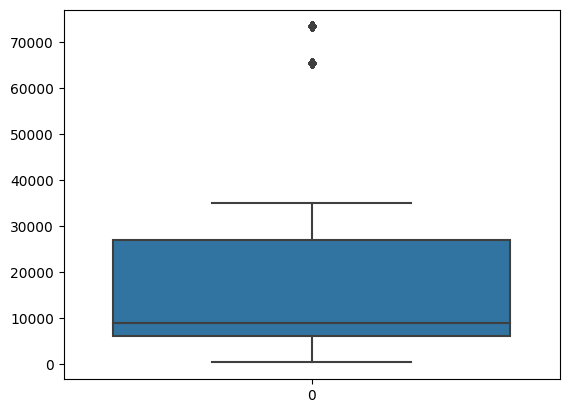

In [15]:
sns.boxplot(df['population_density'])

<h3> Bi Variate Analysis (Feature Discretization)

In [278]:
num

policy_tenure  age_of_car  age_of_policyholder  population_density
0           0.515874        0.05             0.644231                4990
1           0.672619        0.02             0.375000               27003
2           0.841110        0.02             0.384615                4076
3           0.900277        0.11             0.432692               21622
4           0.596403        0.11             0.634615               34738
...              ...         ...                  ...                 ...
58587       0.355089        0.13             0.644231                8794
58588       1.199642        0.02             0.519231                7788
58589       1.162273        0.05             0.451923               34738
58590       1.236307        0.14             0.557692                8794
58591       0.124429        0.02             0.442308                8794

[58592 rows x 4 columns]

In [276]:
from sklearn.preprocessing import KBinsDiscretizer
kbin = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
num_binned = pd.DataFrame(kbin.fit_transform(num), index=num.index, columns=num.columns,).add_suffix('_rank')
num_binned.head()

policy_tenure_rank  age_of_car_rank  age_of_policyholder_rank  \
0                 4.0              4.0                       9.0   
1                 5.0              2.0                       2.0   
2                 6.0              2.0                       3.0   
3                 6.0              7.0                       4.0   
4                 5.0              7.0                       8.0   

   population_density_rank  
0                      1.0  
1                      6.0  
2                      1.0  
3                      5.0  
4                      7.0

In [193]:
num_combined = pd.concat([num, y], axis=1, join='inner')

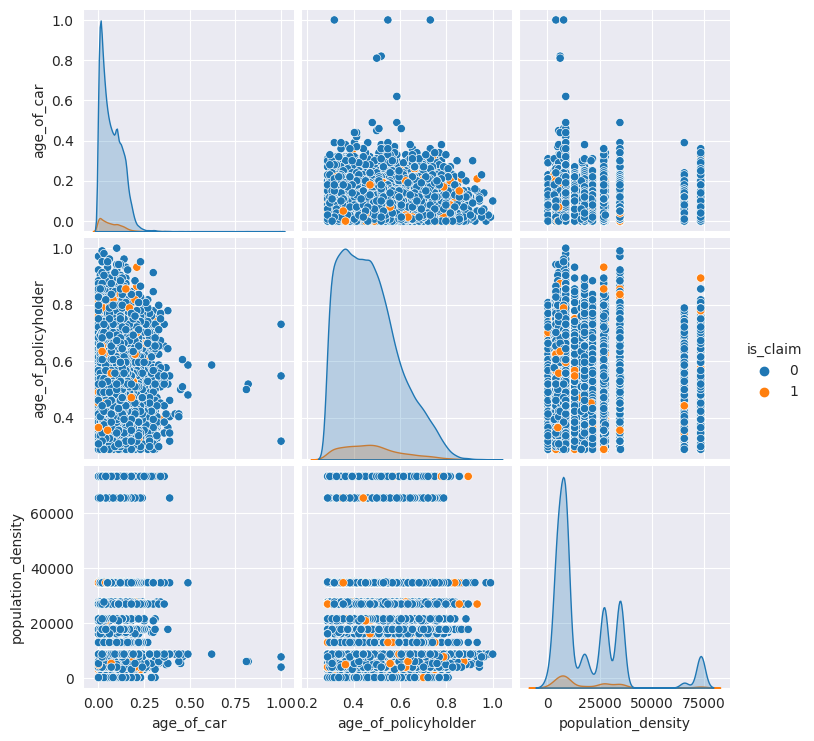

In [ ]:
sns.pairplot(data=num_combined, hue='is_claim')

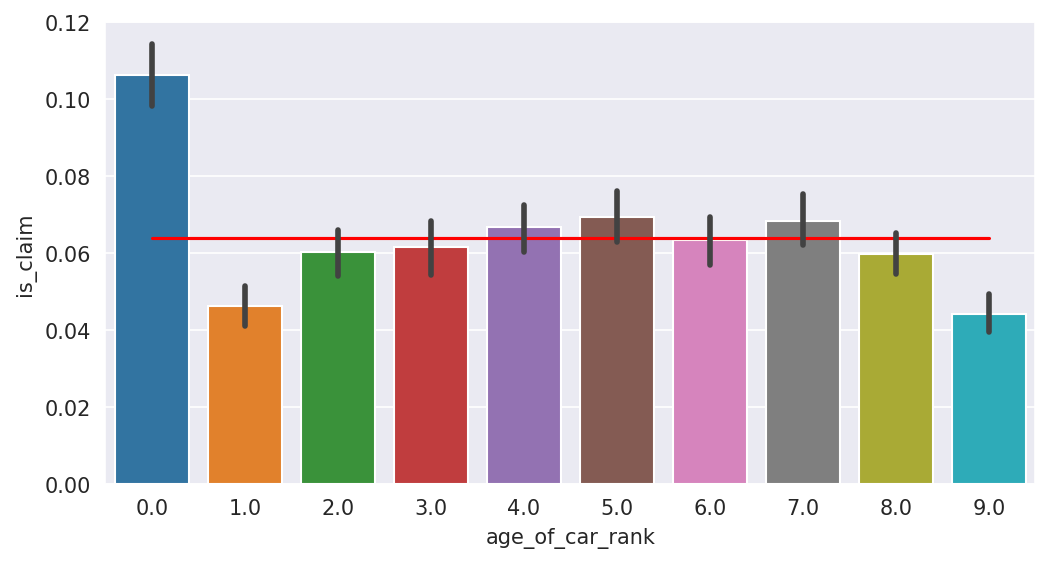

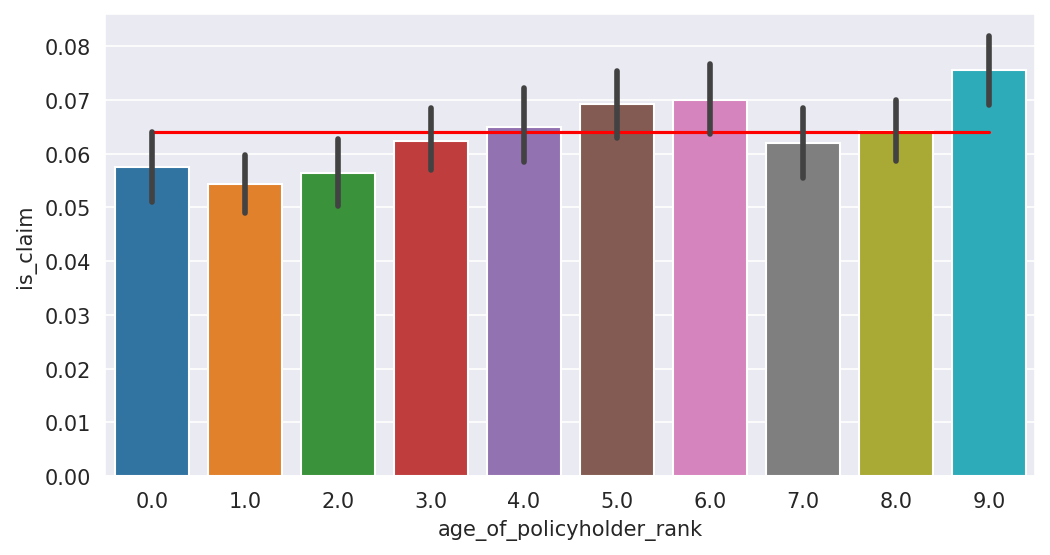

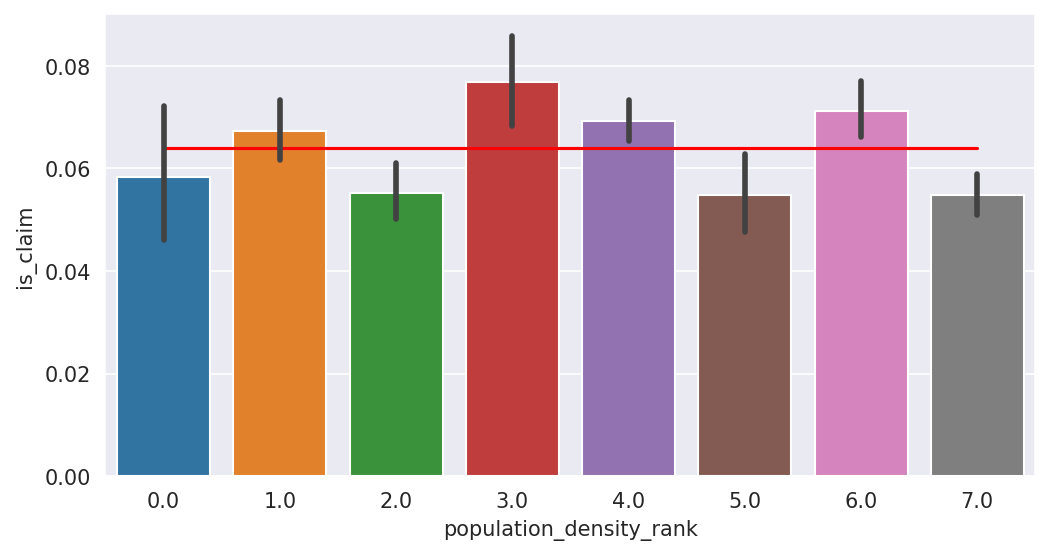

In [ ]:
X_bin_combined = pd.concat([num_binned, y], axis=1, join='inner')
for col in num_binned.columns:
    plt.figure(figsize=(8,4), dpi=150)
    sns.lineplot(x=col, y=y.mean(), data=X_bin_combined, color='red')
    sns.barplot(x=col, y='is_claim', data=X_bin_combined, estimator=np.mean)
plt.show()

In [18]:
num.corr()

age_of_car  age_of_policyholder  population_density
age_of_car             1.000000            -0.035427           -0.062255
age_of_policyholder   -0.035427             1.000000            0.009669
population_density    -0.062255             0.009669            1.000000

<Axes: >

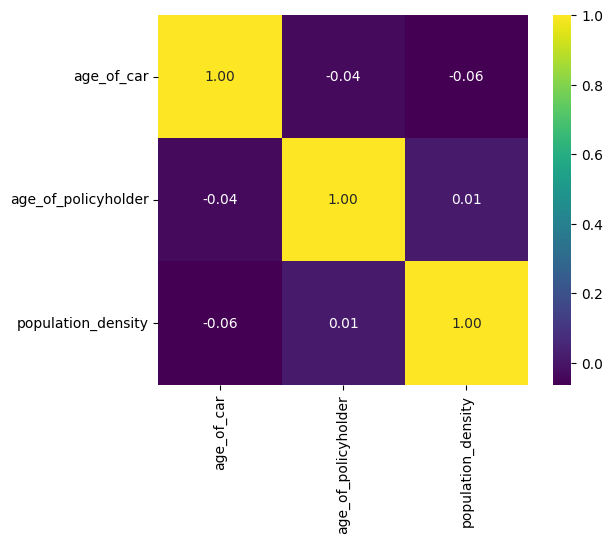

In [19]:
sns.heatmap(num.corr(), fmt='.2f', square=True, annot=True, cmap='viridis')

<h3> Feature Selection - Categorical Features

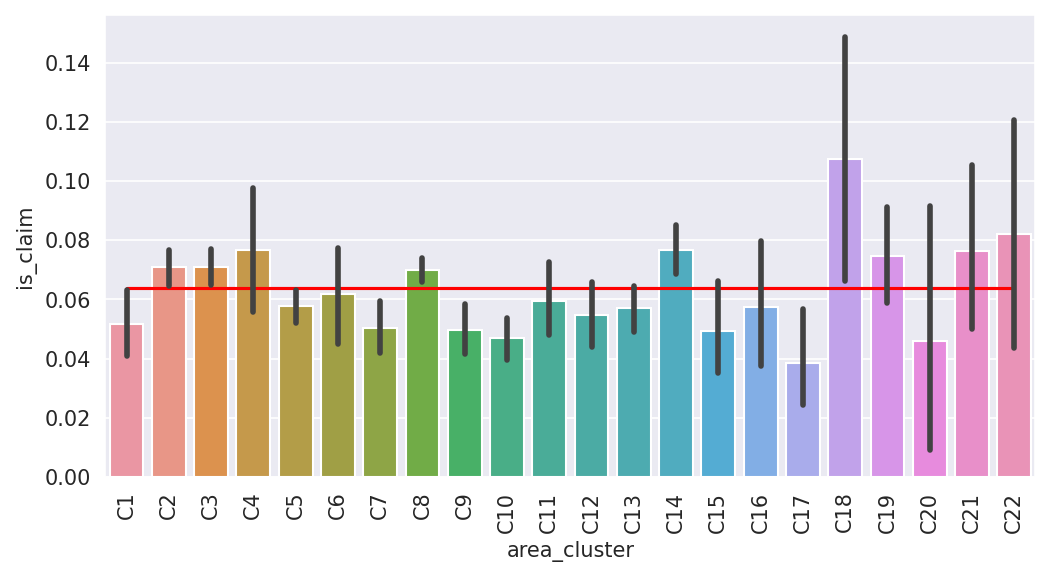

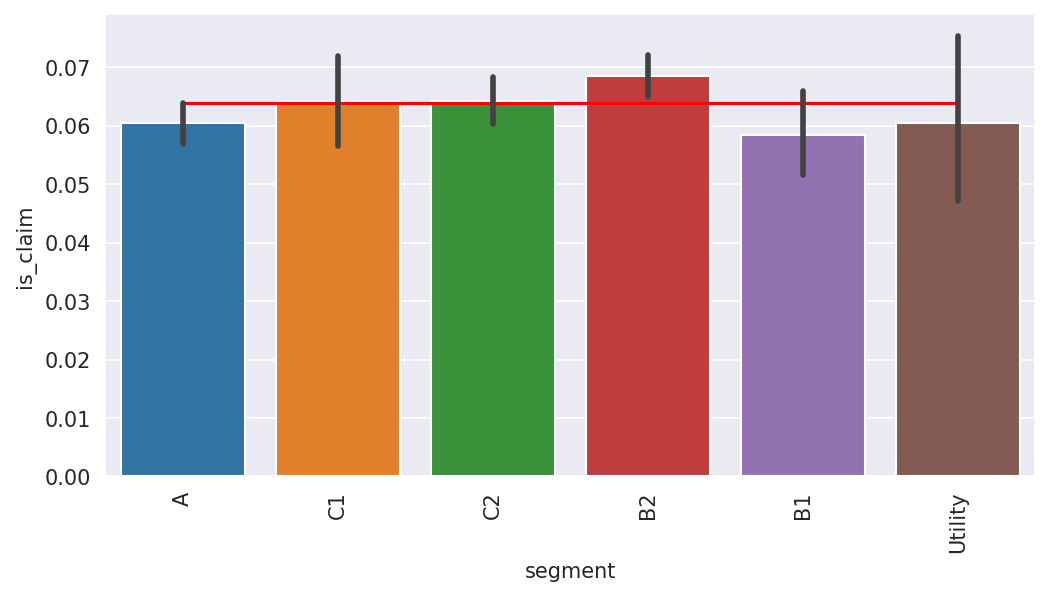

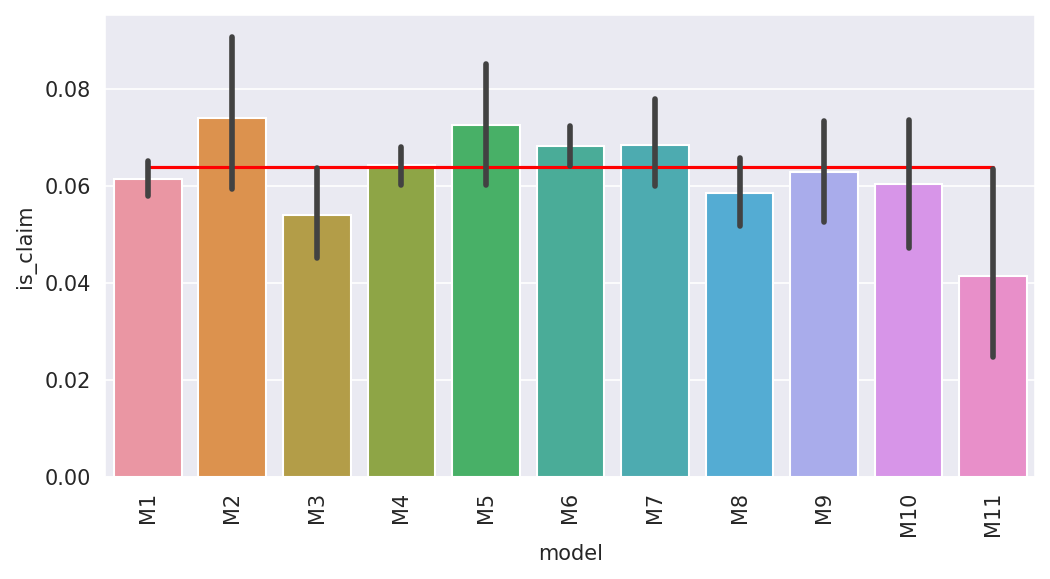

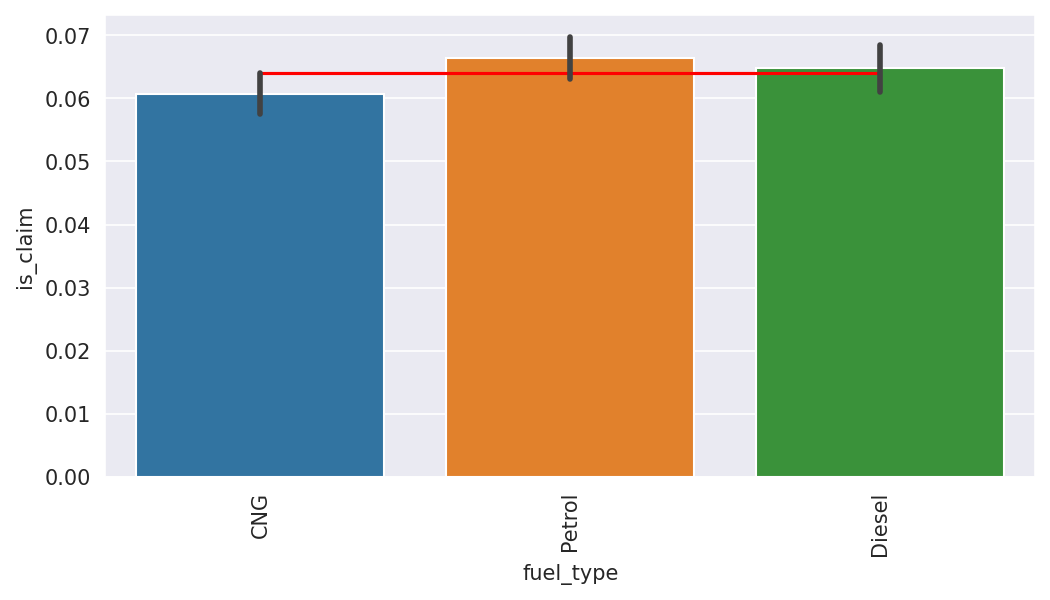

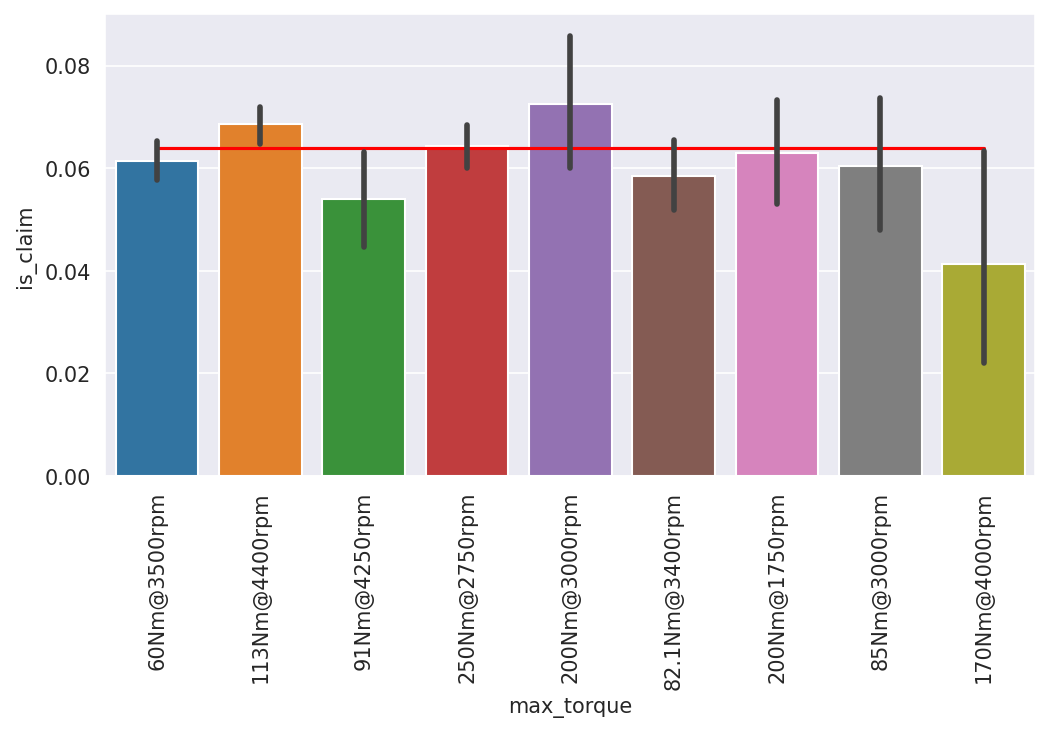

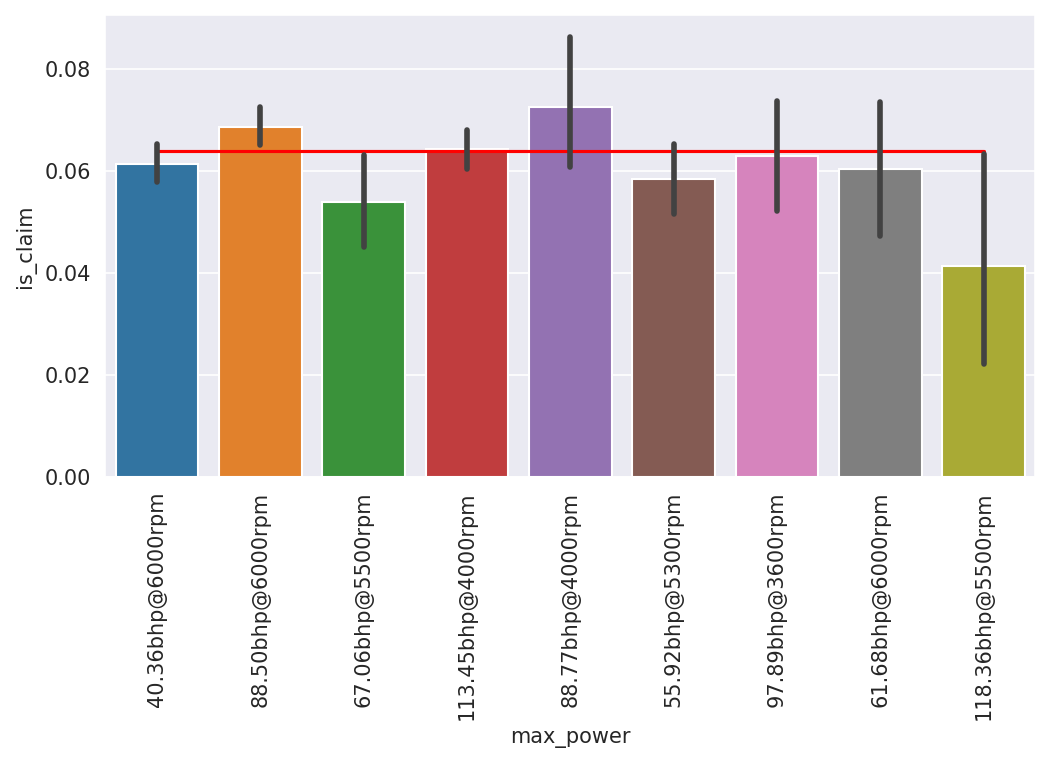

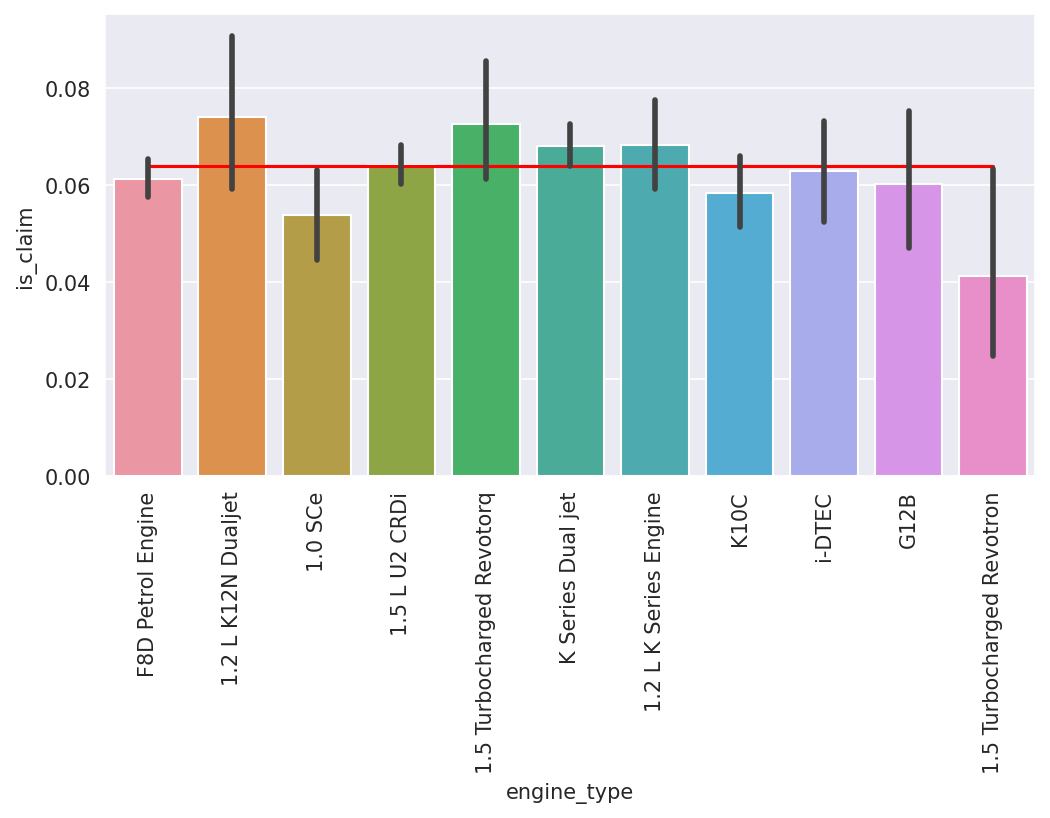

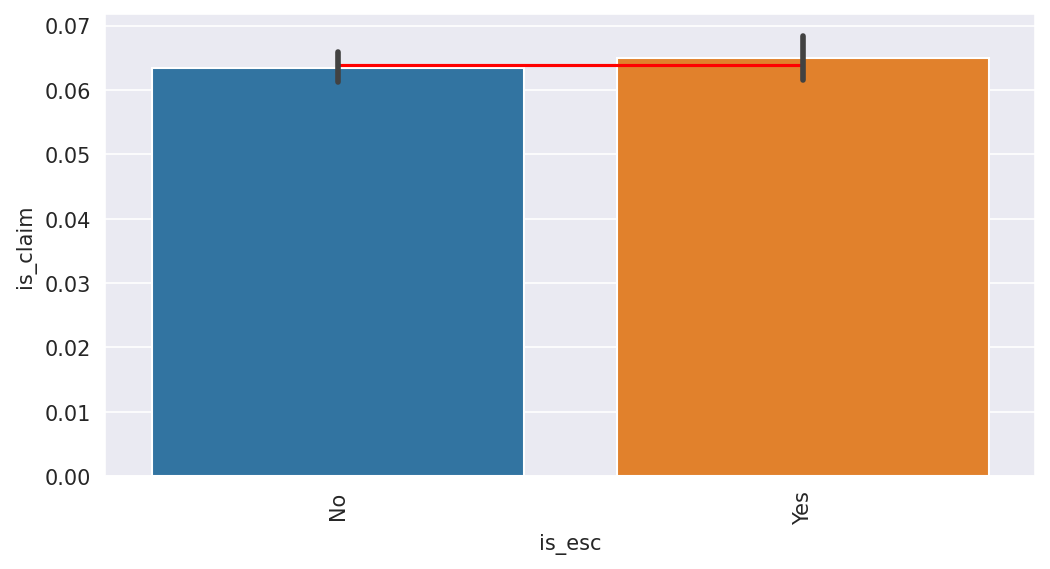

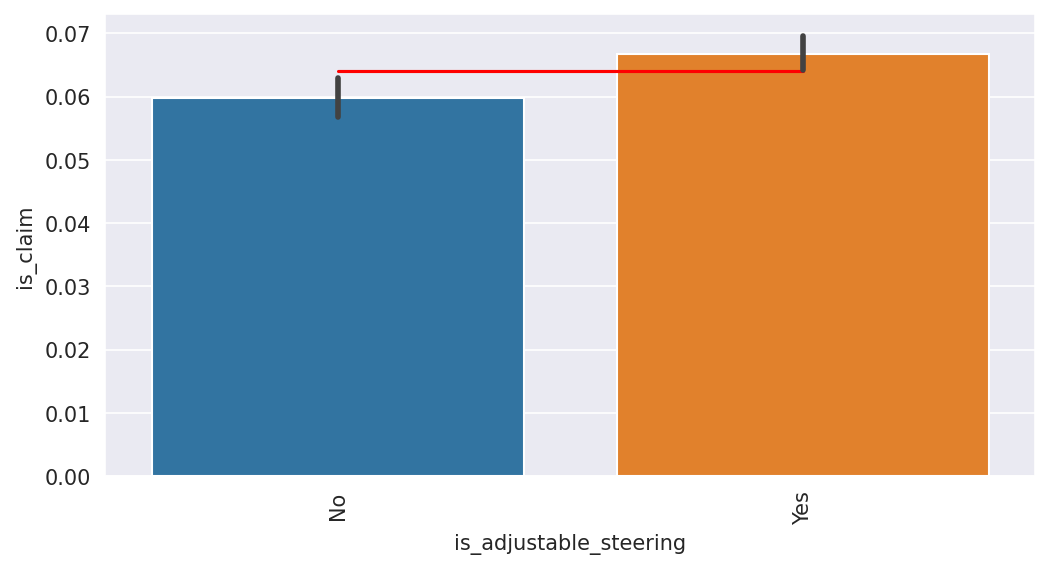

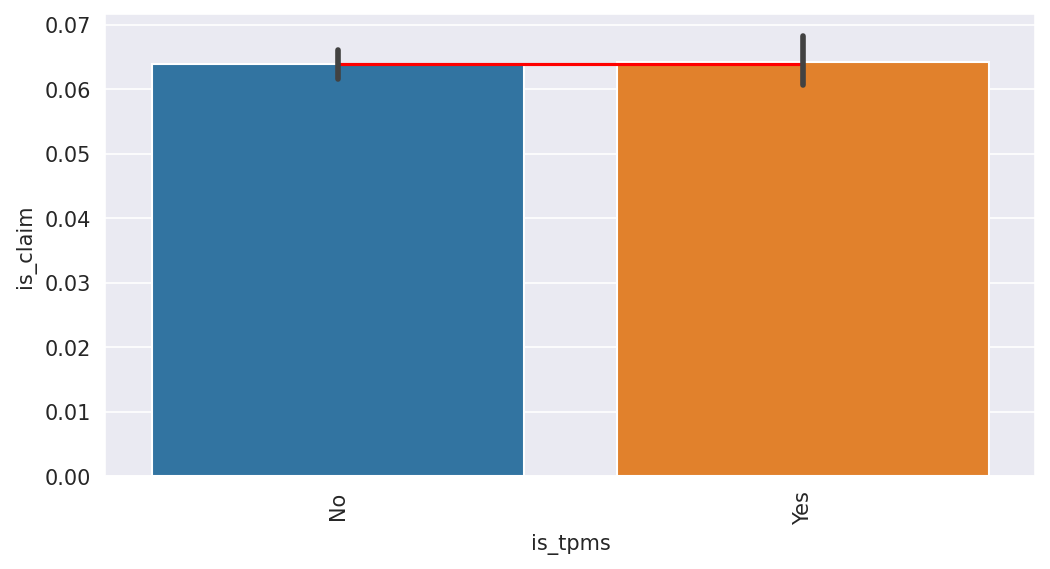

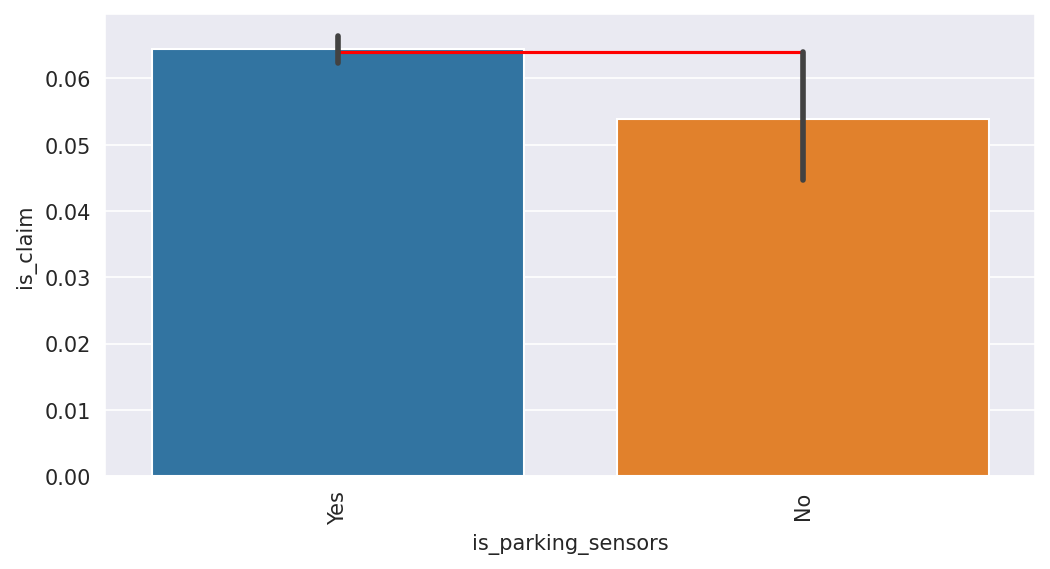

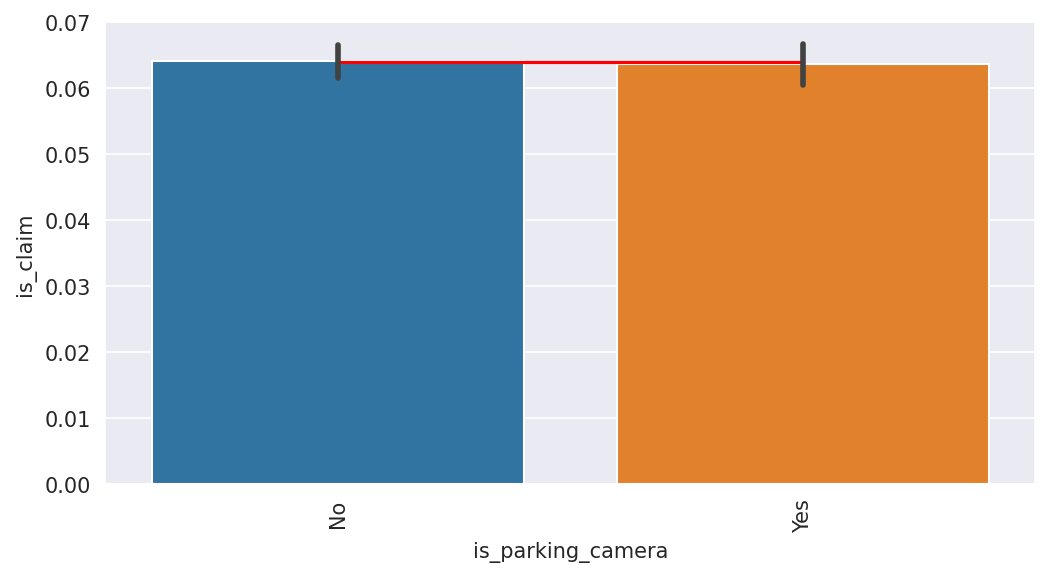

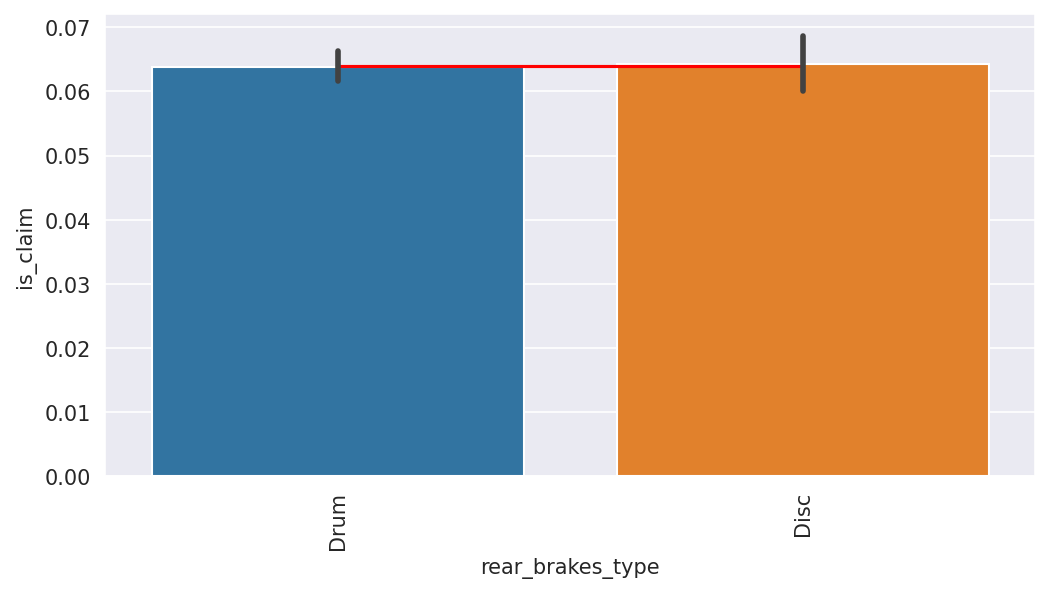

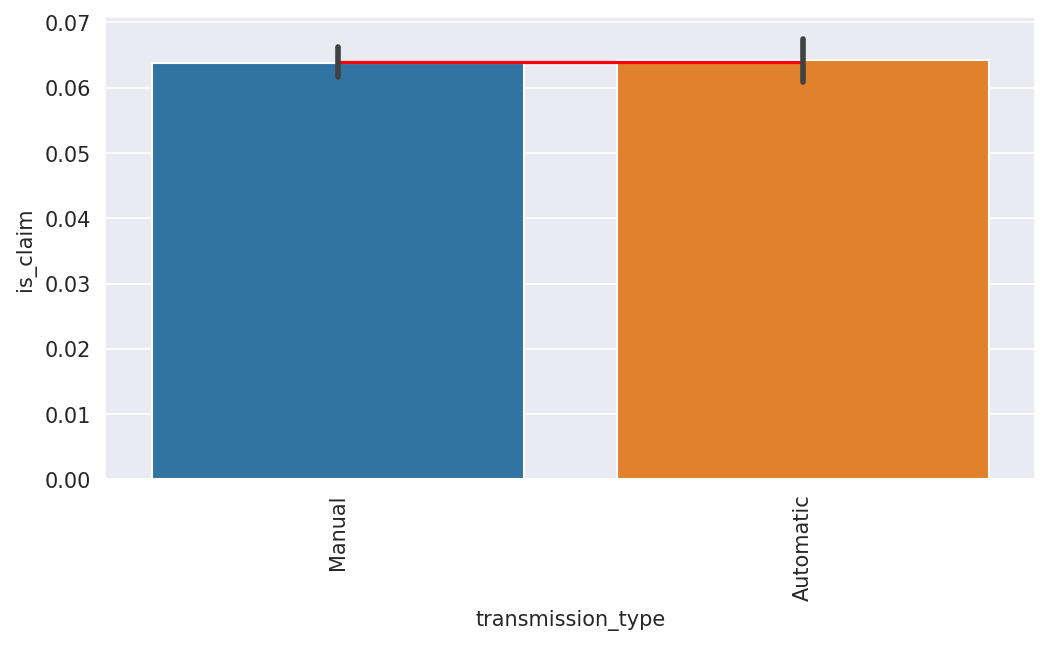

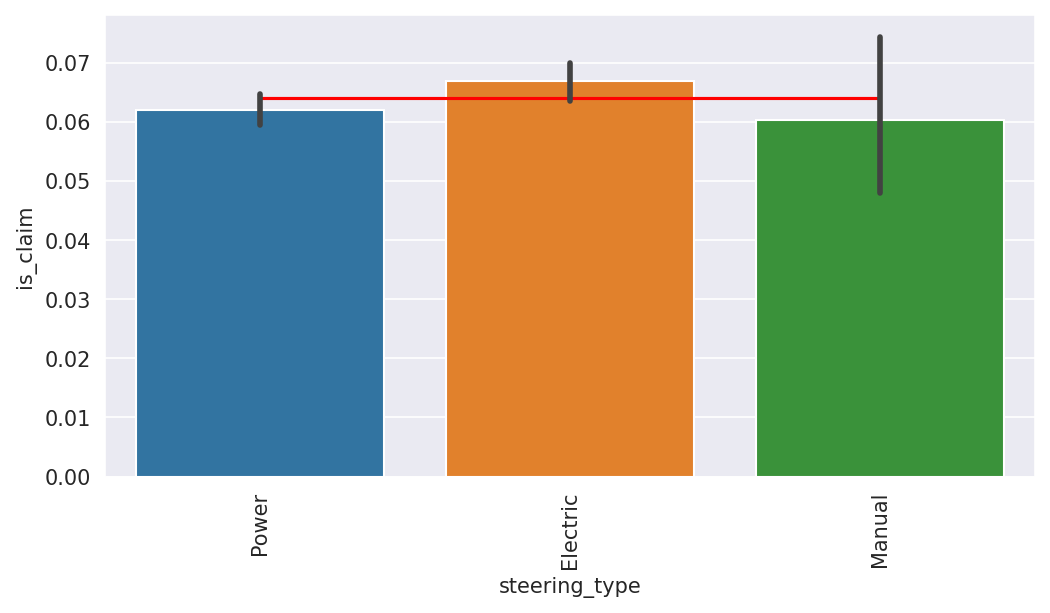

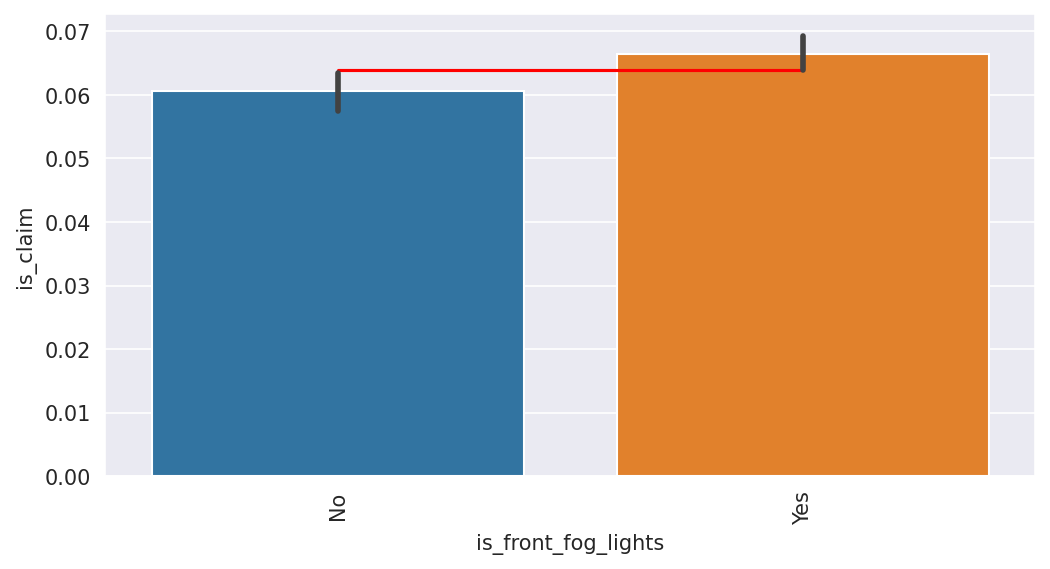

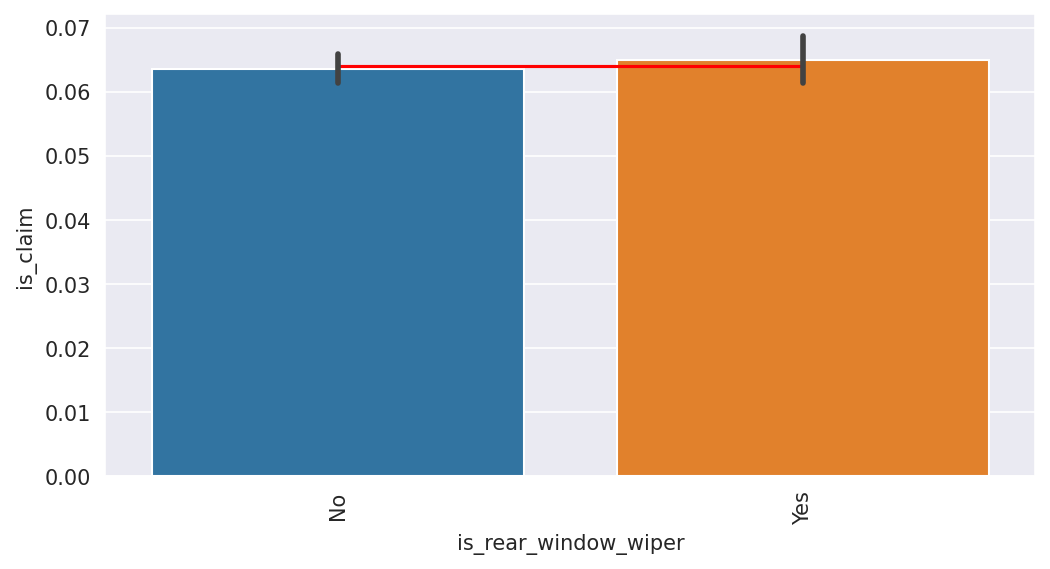

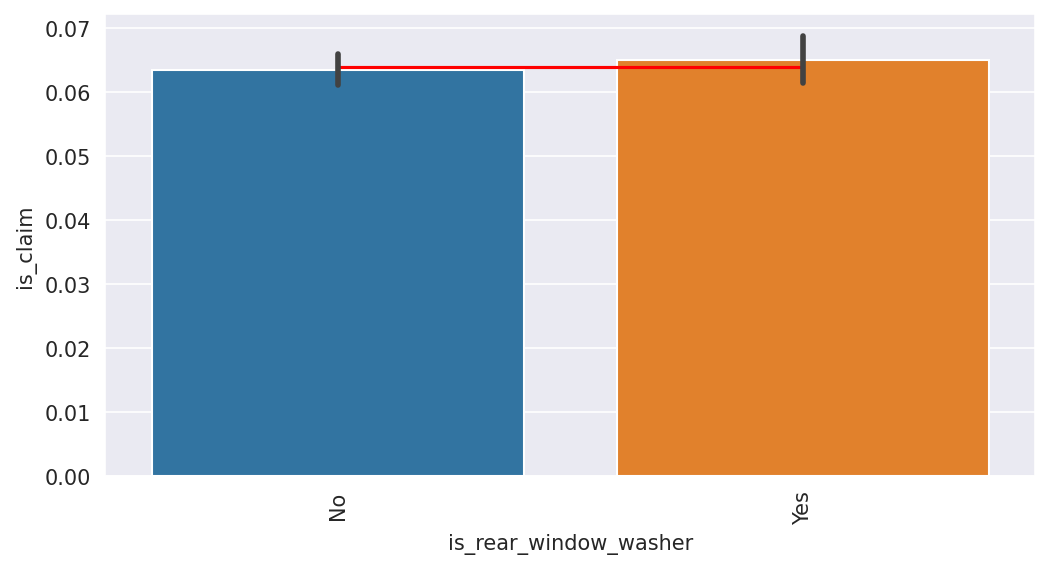

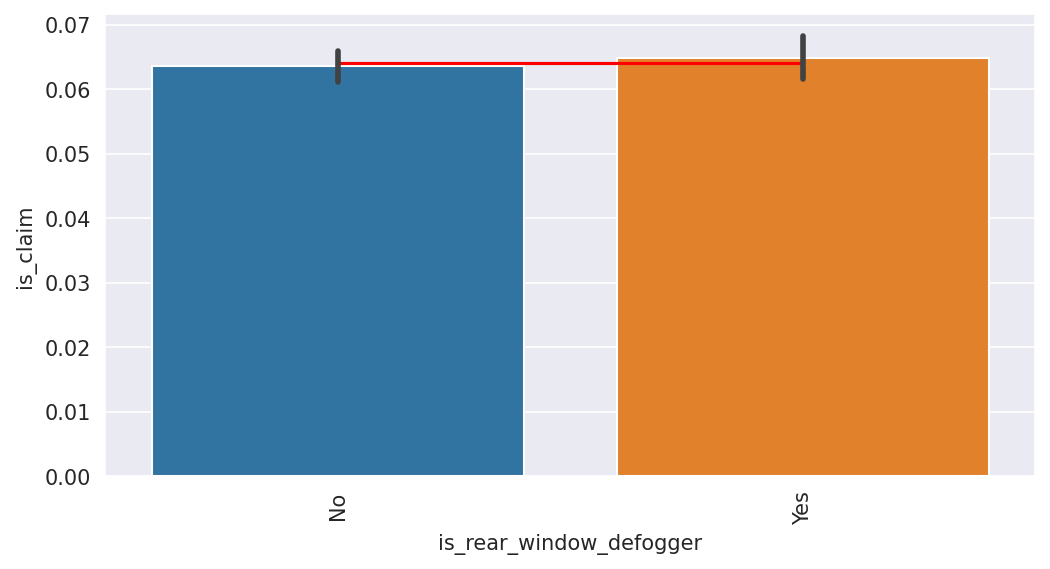

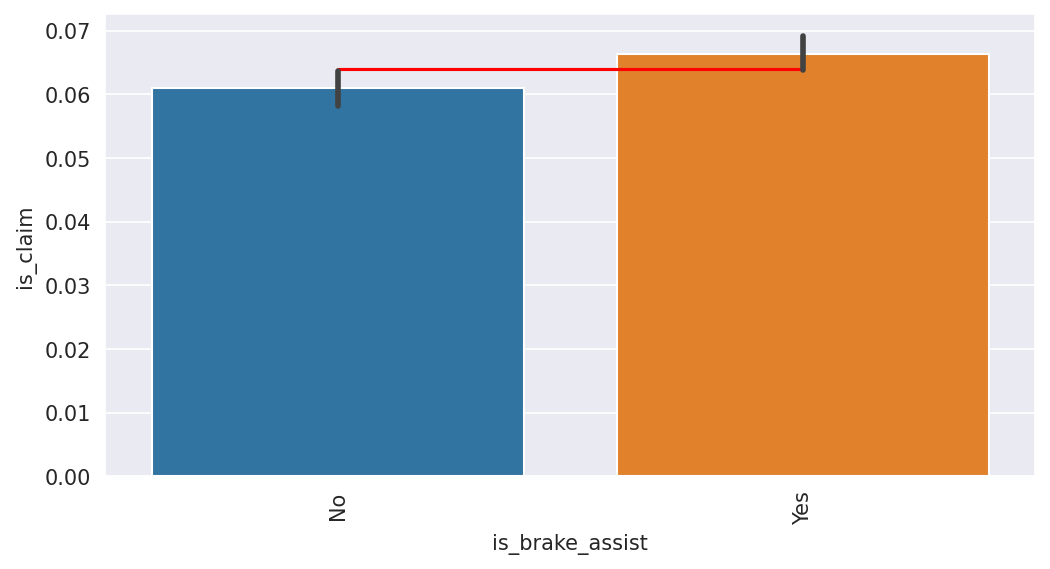

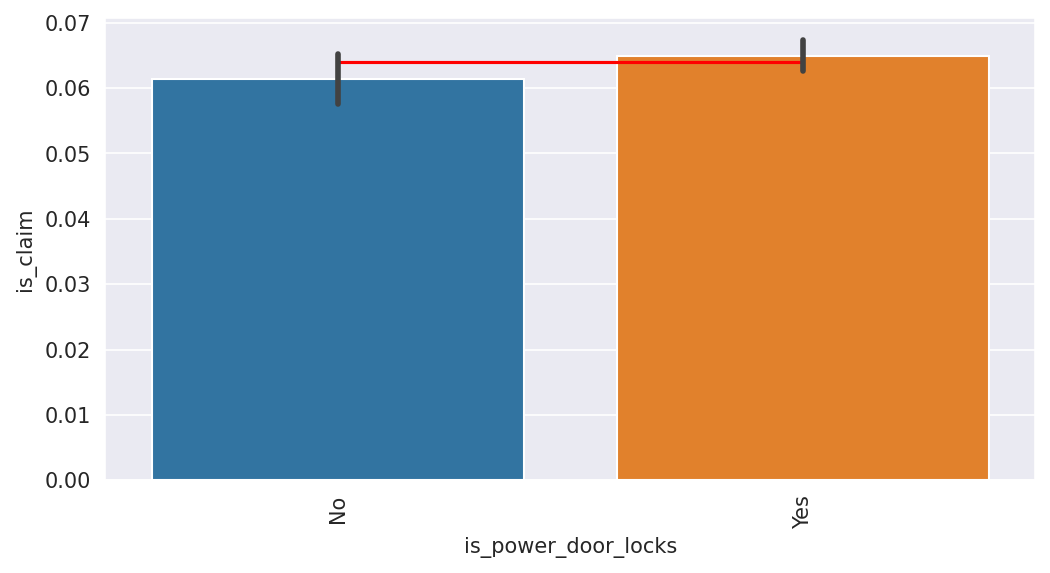

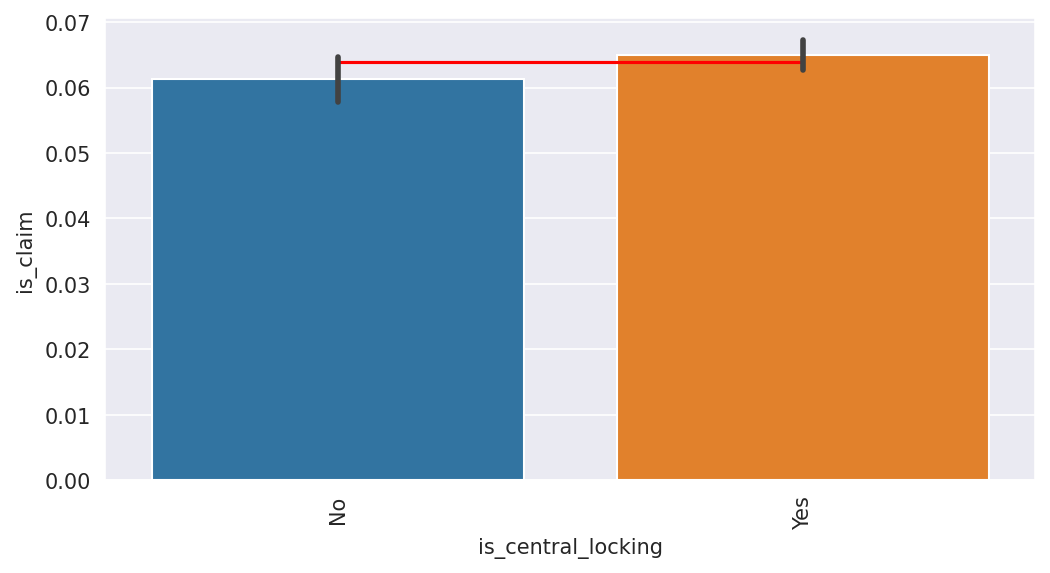

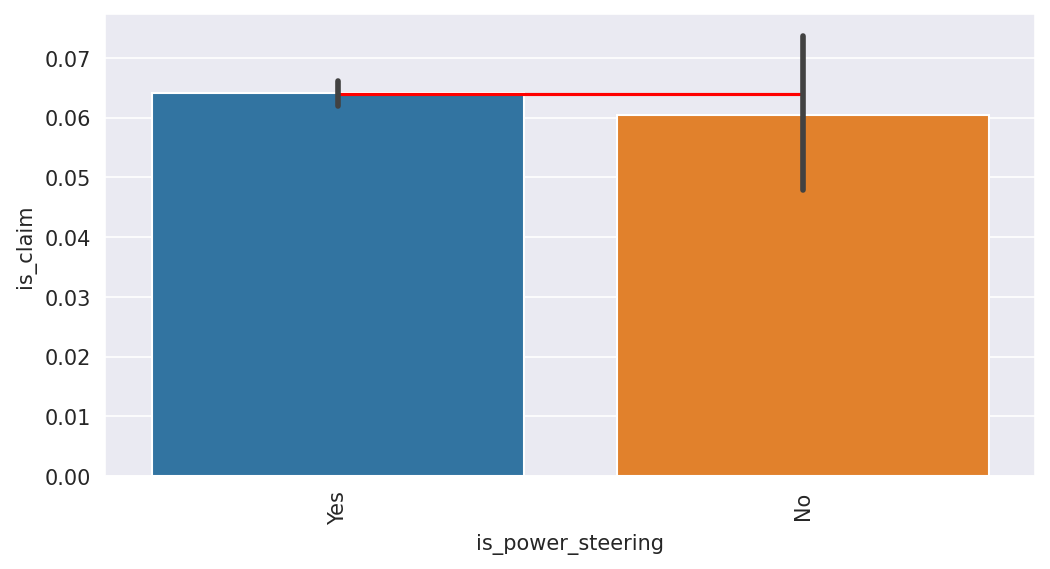

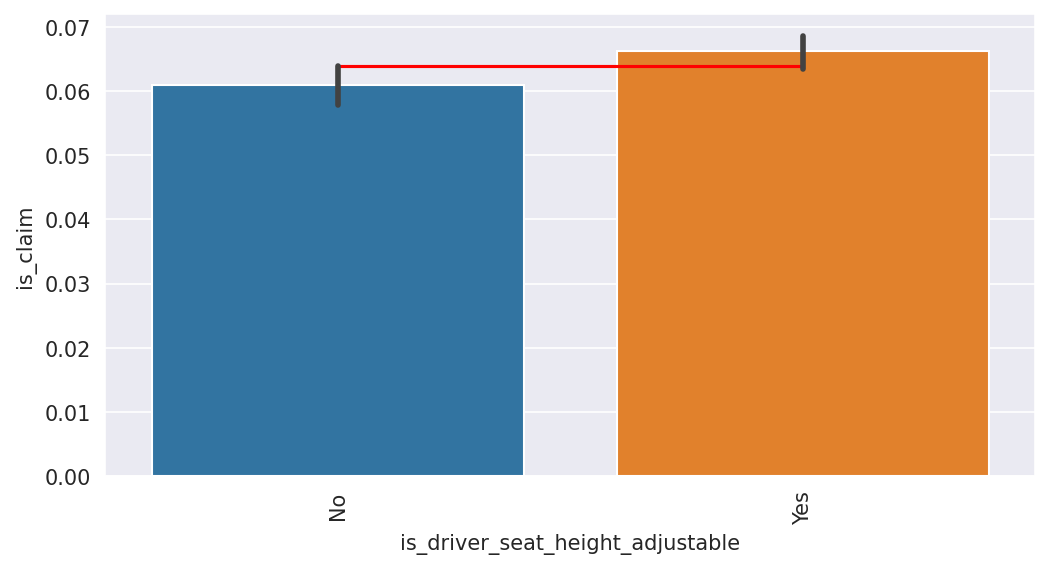

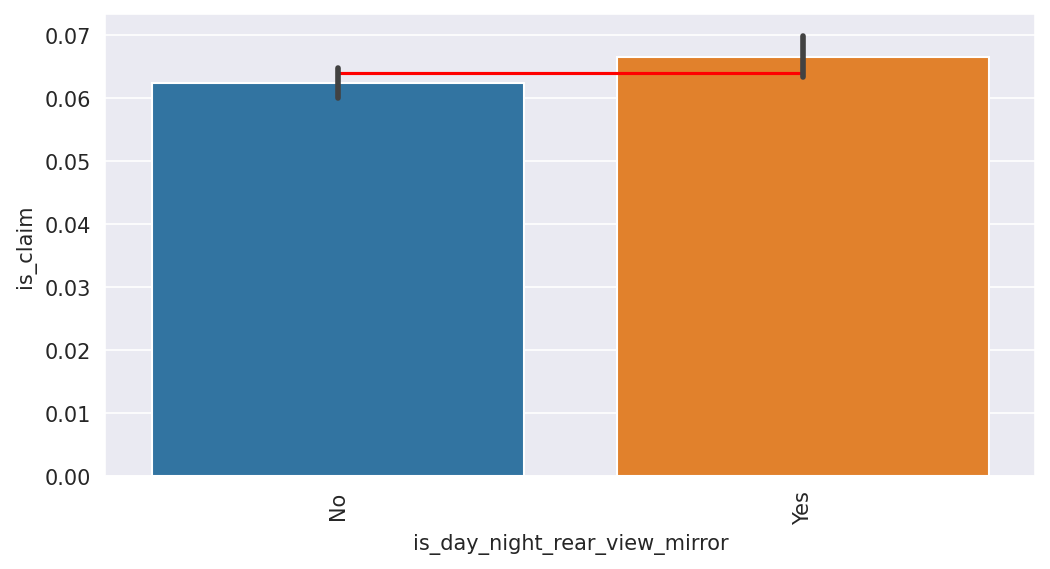

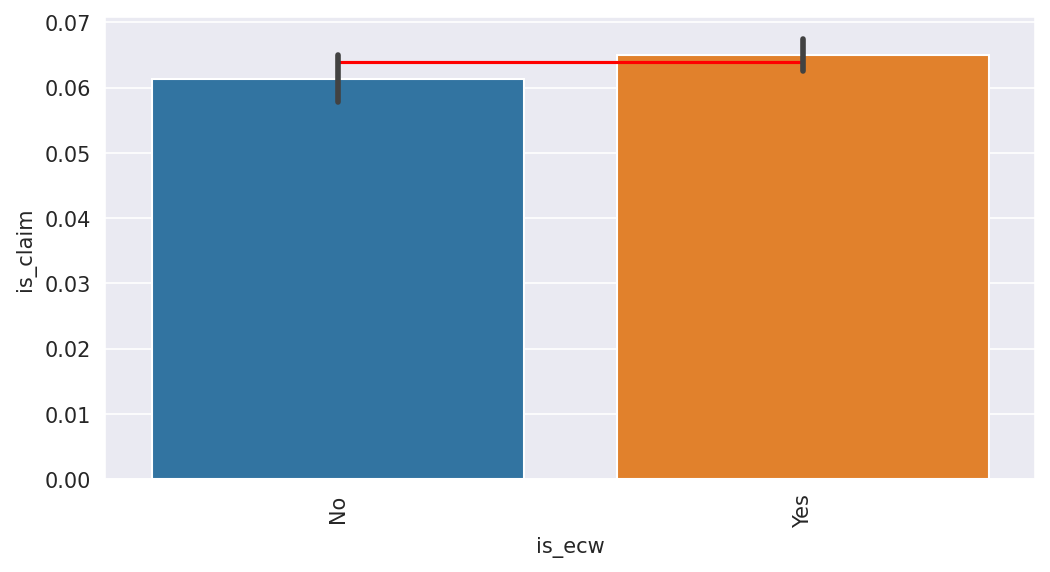

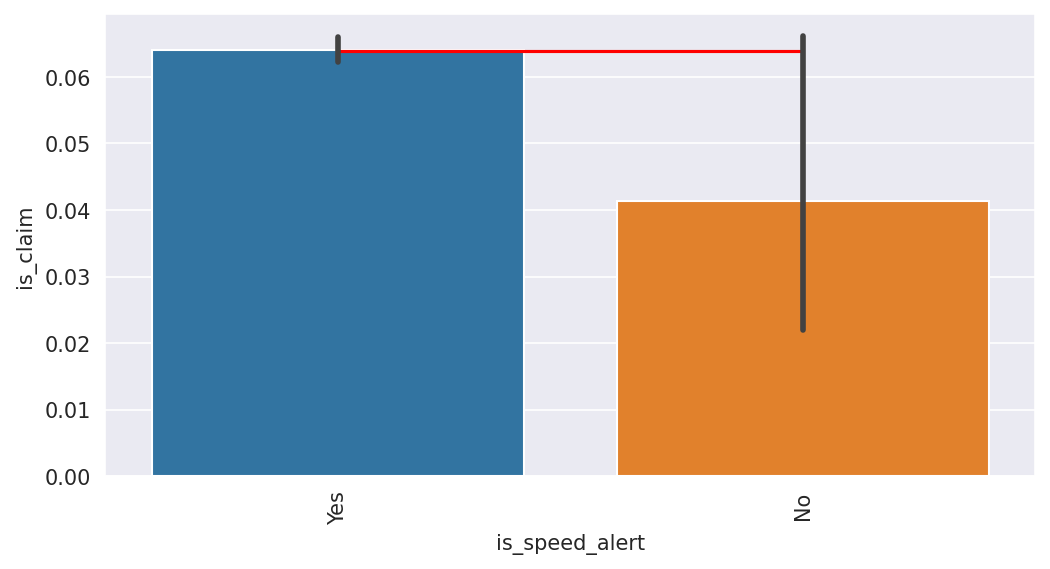

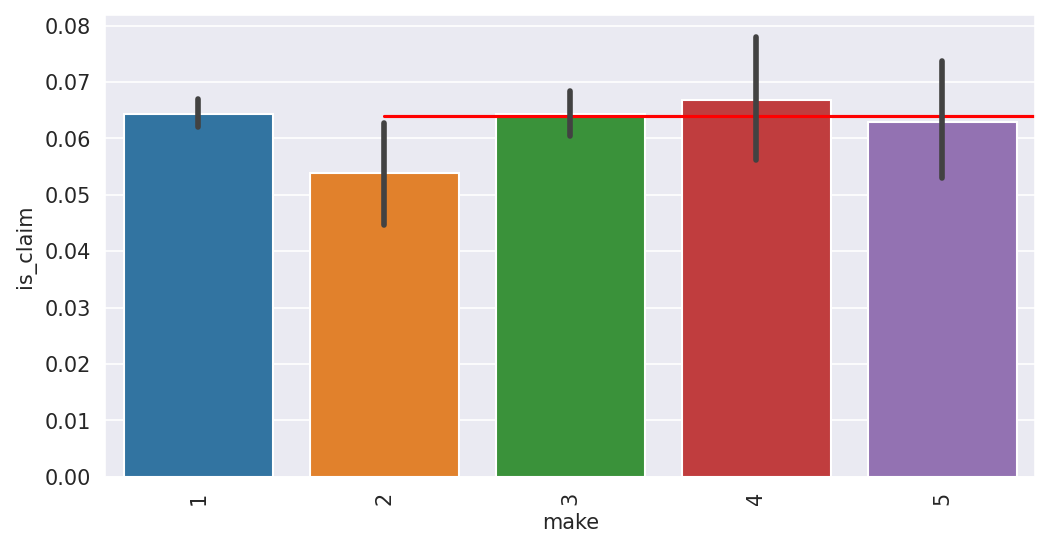

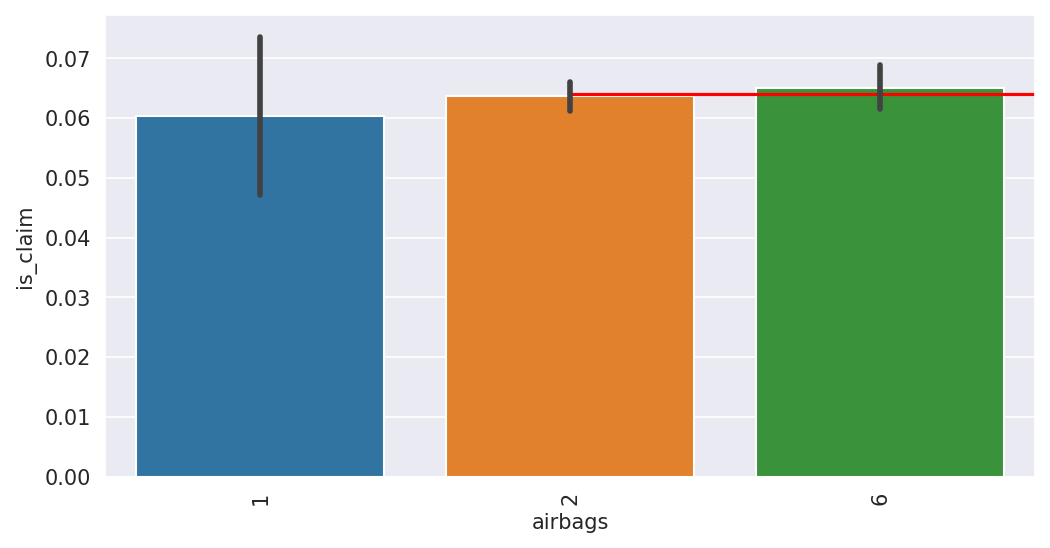

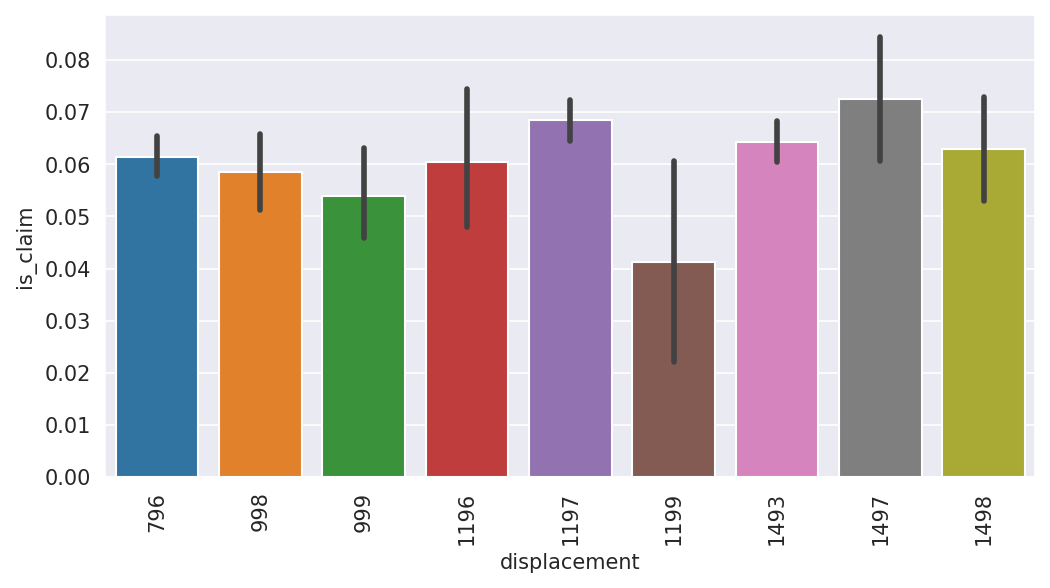

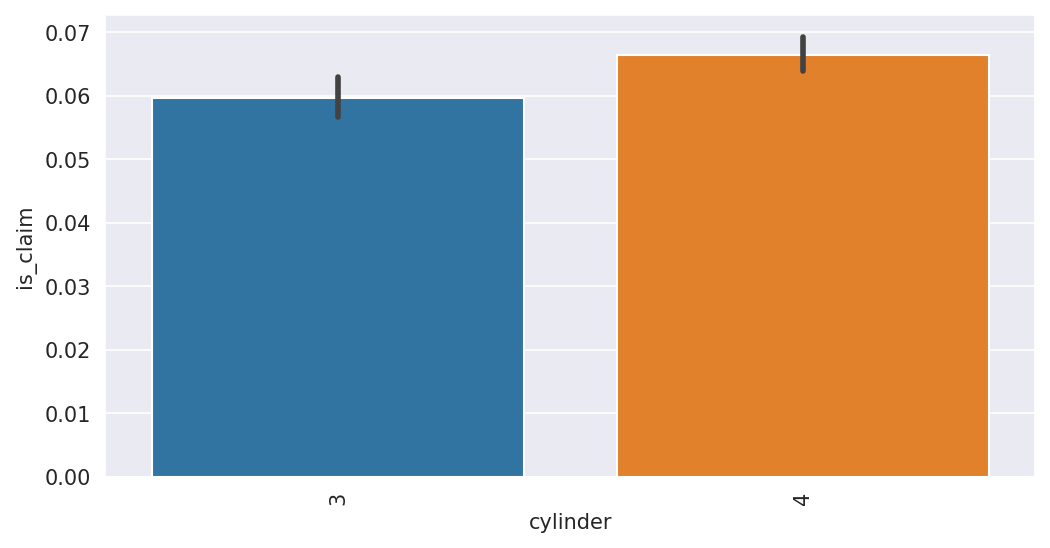

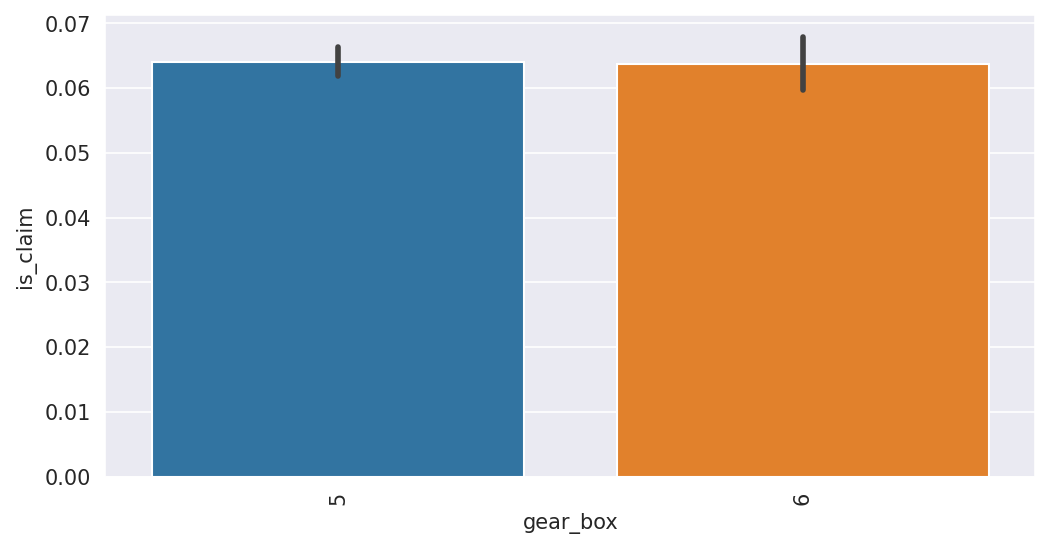

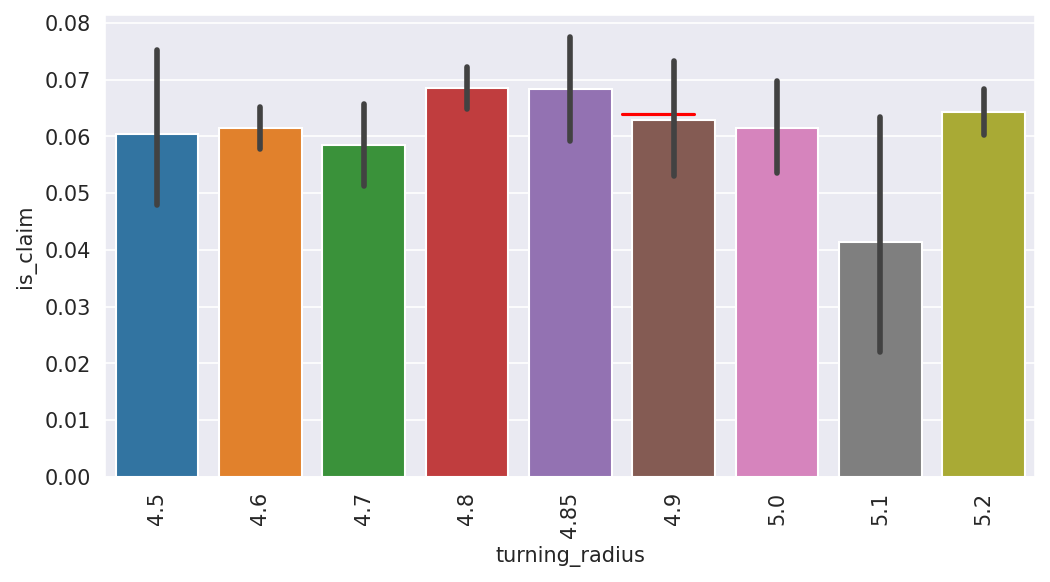

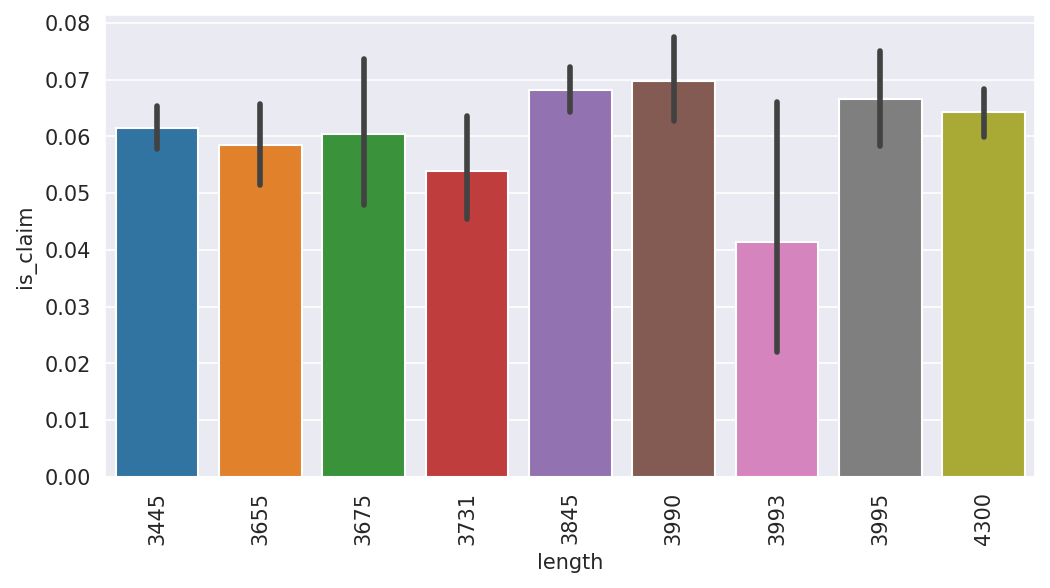

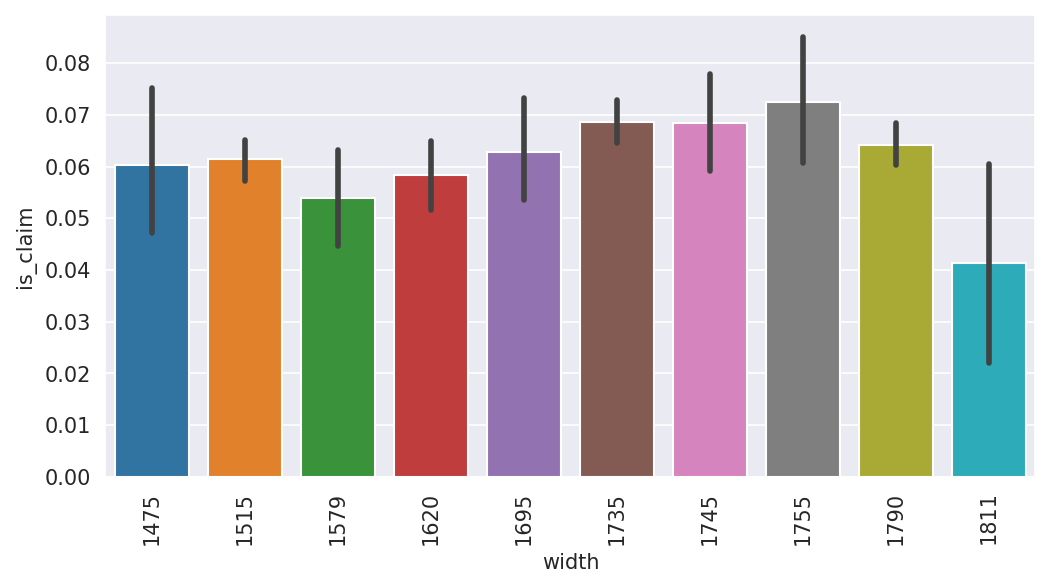

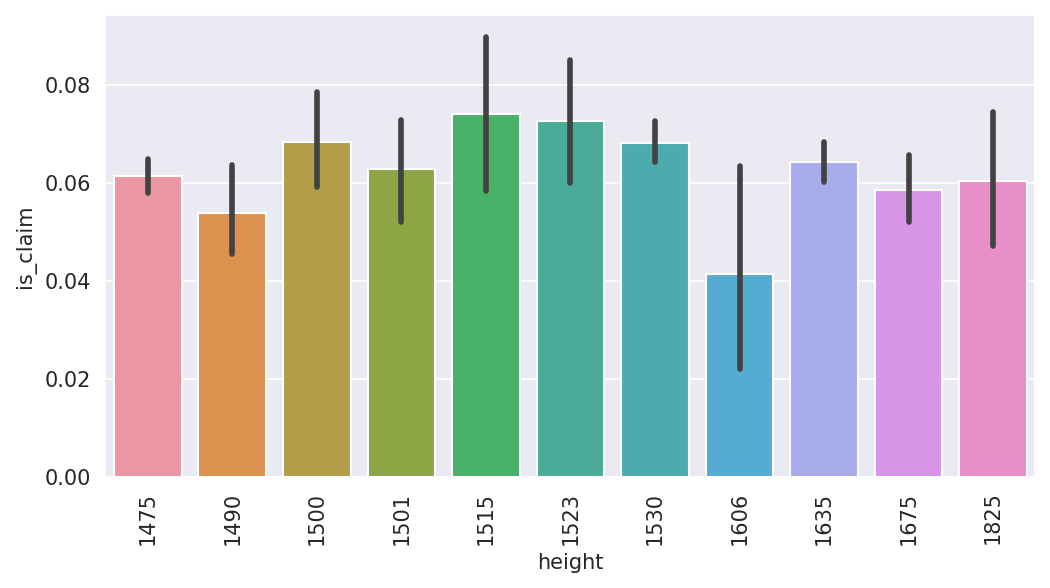

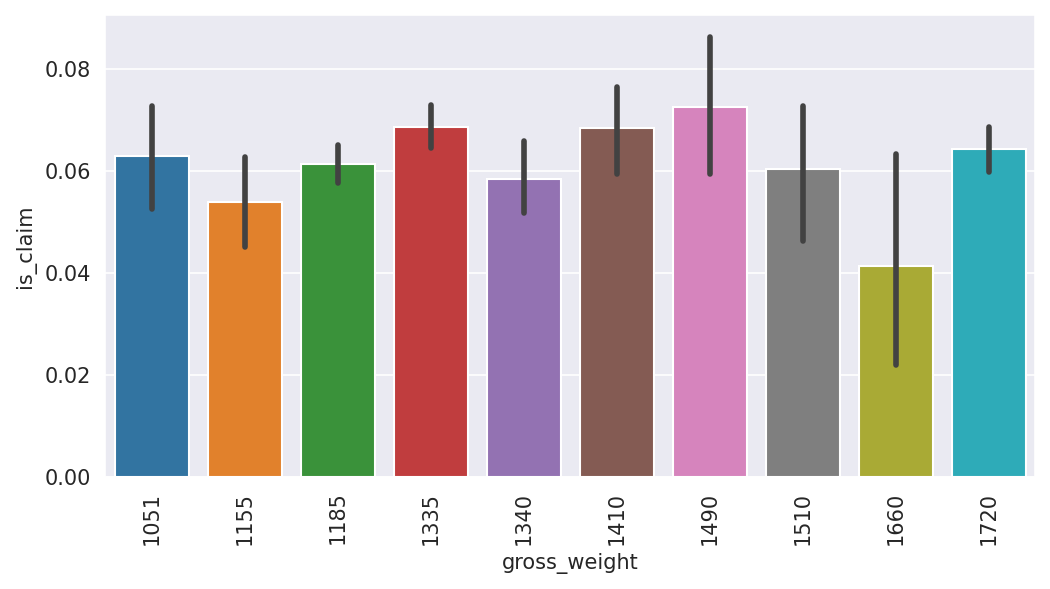

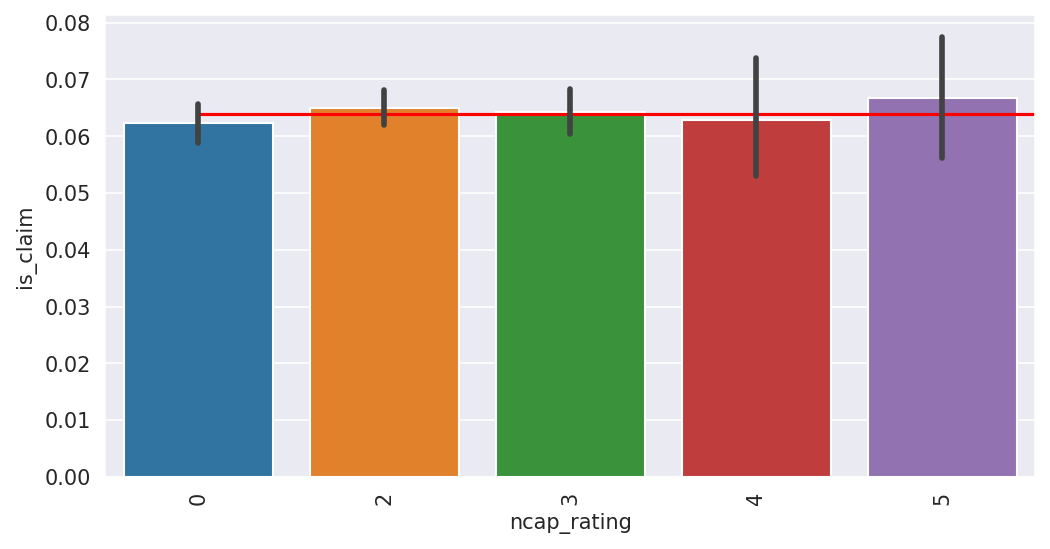

In [ ]:
X_char_merged = pd.concat([char, y],axis=1,join='inner')

for col in char.columns:
    plt.figure(figsize=(8, 4), dpi=150)
    sns.lineplot(x=col, y=y.mean(), data=X_char_merged, color='red')
    sns.barplot(x=col, y='is_claim', data=X_char_merged, estimator=np.mean)
    plt.xticks(rotation=90)
plt.show()

In [195]:
char.dtypes

area_cluster                         object
segment                              object
model                                object
fuel_type                            object
engine_type                          object
is_esc                               object
is_adjustable_steering               object
is_tpms                              object
is_parking_sensors                   object
is_parking_camera                    object
rear_brakes_type                     object
transmission_type                    object
steering_type                        object
is_front_fog_lights                  object
is_rear_window_wiper                 object
is_rear_window_washer                object
is_rear_window_defogger              object
is_brake_assist                      object
is_power_door_locks                  object
is_central_locking                   object
is_power_steering                    object
is_driver_seat_height_adjustable     object
is_day_night_rear_view_mirror   

In [196]:
char['make']=char['make'].astype('object')
char['airbags']=char['airbags'].astype('object')
char['displacement']=char['displacement'].astype('object')
char['cylinder']=char['cylinder'].astype('object')
char['gear_box']=char['gear_box'].astype('object')
char['turning_radius']=char['turning_radius'].astype('object')
char['gross_weight']=char['gross_weight'].astype('object')
char['ncap_rating']=char['ncap_rating'].astype('object')
char['max_torque_Nm']=char['max_torque_Nm'].astype('object')
char['max_torque_rpm']=char['max_torque_rpm'].astype('object')
char['max_power_bhp']=char['max_power_bhp'].astype('object')
char['max_power_rpm']=char['max_power_rpm'].astype('object')
char['volume']=char['volume'].astype('object')

In [197]:
char.dtypes

area_cluster                        object
segment                             object
model                               object
fuel_type                           object
engine_type                         object
is_esc                              object
is_adjustable_steering              object
is_tpms                             object
is_parking_sensors                  object
is_parking_camera                   object
rear_brakes_type                    object
transmission_type                   object
steering_type                       object
is_front_fog_lights                 object
is_rear_window_wiper                object
is_rear_window_washer               object
is_rear_window_defogger             object
is_brake_assist                     object
is_power_door_locks                 object
is_central_locking                  object
is_power_steering                   object
is_driver_seat_height_adjustable    object
is_day_night_rear_view_mirror       object
is_ecw     

In [198]:
X_char_dum = pd.get_dummies(char, drop_first = True)
X_char_dum.shape

(58592, 142)

In [199]:
X_char_dum.head()

area_cluster_C10  area_cluster_C11  area_cluster_C12  area_cluster_C13  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   area_cluster_C14  area_cluster_C15  area_cluster_C16  area_cluster_C17  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   area_cluster_C18  area_cluster_C19  area_cluster_C2  area_cluster_C20  \
0                 0                 0                0                 0   
1                 0                 0                1                 0   
2                 0                 0                0                 0   
3                 0                 0                0                 0   
4                 0                 0                0                 0   

   area_cluster_C21  area_cluster_C22  area_cluster_C3  area_cluster_C4  \
0                 0                 0                0                0   
1                 0                 0                0                0   
2                 0                 0                1                0   
3                 0                 0                0                1   
4                 0                 0                0                0   

   area_cluster_C5  area_cluster_C6  area_cluster_C7  area_cluster_C8  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                1                0                0                0   

   area_cluster_C9  segment_B1  segment_B2  segment_C1  segment_C2  \
0                0           0           0           0           0   
1                0           0           0           0           0   
2                0           0           0           0           0   
3                0           0           0           1           0   
4                0           0           0           0           0   

   segment_Utility  model_M10  model_M11  model_M2  model_M3  model_M4  \
0                0          0          0         0         0         0   
1                0          0          0         0         0         0   
2                0          0          0         0         0         0   
3                0          0          0         1         0         0   
4                0          0          0         0         1         0   

   model_M5  model_M6  model_M7  model_M8  model_M9  fuel_type_Diesel  \
0         0         0         0         0         0                 0   
1         0         0         0         0         0                 0   
2         0         0         0         0         0                 0   
3         0         0         0         0         0                 0   
4         0         0         0         0         0                 0   

   fuel_type_Petrol  engine_type_1.2 L K Series Engine  \
0                 0                                  0   
1                 0                                  0   
2                 0                                  0   
3                 1                                  0   
4                 1                                  0   

   engine_type_1.2 L K12N Dualjet  engine_type_1.5 L U2 CRDi  \
0           

In [200]:
num_binned.head()

policy_tenure_rank  age_of_car_rank  age_of_policyholder_rank  \
0                 4.0              4.0                       9.0   
1                 5.0              2.0                       2.0   
2                 6.0              2.0                       3.0   
3                 6.0              7.0                       4.0   
4                 5.0              7.0                       8.0   

   population_density_rank  
0                      1.0  
1                      6.0  
2                      1.0  
3                      5.0  
4                      7.0

<h3> Creating the Master Feature Set for Model Development

In [201]:
X_all = pd.concat([num_binned, X_char_dum], axis=1, join="inner")

In [202]:
X_all.head()

policy_tenure_rank  age_of_car_rank  age_of_policyholder_rank  \
0                 4.0              4.0                       9.0   
1                 5.0              2.0                       2.0   
2                 6.0              2.0                       3.0   
3                 6.0              7.0                       4.0   
4                 5.0              7.0                       8.0   

   population_density_rank  area_cluster_C10  area_cluster_C11  \
0                      1.0                 0                 0   
1                      6.0                 0                 0   
2                      1.0                 0                 0   
3                      5.0                 0                 0   
4                      7.0                 0                 0   

   area_cluster_C12  area_cluster_C13  area_cluster_C14  area_cluster_C15  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   area_cluster_C16  area_cluster_C17  area_cluster_C18  area_cluster_C19  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   area_cluster_C2  area_cluster_C20  area_cluster_C21  area_cluster_C22  \
0                0                 0                 0                 0   
1                1                 0                 0                 0   
2                0                 0                 0                 0   
3                0                 0                 0                 0   
4                0                 0                 0                 0   

   area_cluster_C3  area_cluster_C4  area_cluster_C5  area_cluster_C6  \
0                0                0                0                0   
1                0                0                0                0   
2                1                0                0                0   
3                0                1                0                0   
4                0                0                1                0   

   area_cluster_C7  area_cluster_C8  area_cluster_C9  segment_B1  segment_B2  \
0                0                0                0           0           0   
1                0                0                0           0           0   
2                0                0                0           0           0   
3                0                0                0           0           0   
4                0                0                0           0           0   

   segment_C1  segment_C2  segment_Utility  model_M10  model_M11  model_M2  \
0           0           0                0          0          0         0   
1           0           0                0          0          0         0   
2           0           0                0          0          0         0   
3           1           0                0          0          0         1   
4           0           0                0          0          0         0   

   model_M3  model_M4  model_M5  model_M6  model_M7  model_M8  model_M9  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         1         0         0         0         

In [203]:
X_all.dtypes

policy_tenure_rank          float64
age_of_car_rank             float64
age_of_policyholder_rank    float64
population_density_rank     float64
area_cluster_C10              uint8
                             ...   
volume_10443825000            uint8
volume_10500957375            uint8
volume_10664731350            uint8
volume_11613504738            uint8
volume_12584595000            uint8
Length: 146, dtype: object

<h3> Train Test Split

In [204]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_all, y, test_size=0.15, random_state=101, stratify=y)

In [205]:
print("Shape of Training Data", X_train.shape)
print("Shape of Testing Data", X_test.shape)
print("claim Rate in Training Data", y_train.mean())
print("claim Rate in Testing Data", y_test.mean())

Shape of Training Data (49803, 146)
Shape of Testing Data (8789, 146)
claim Rate in Training Data 0.06397204987651346
claim Rate in Testing Data 0.0639435658209125


In [ ]:
# White Box (Completely Explainable Set of Rules) - Decision Tree
# Black Box Ensemble Methods - Random Forest (With Bagging)

In [209]:
from imblearn.over_sampling import SMOTE, RandomOverSampler, SMOTENC
from imblearn.combine import SMOTEENN
from collections import Counter
# oversample = SMOTE(sampling_strategy=1, )
# x_tr_os, y_tr_os = oversample.fit_resample(X_train, y_train)
# counter = Counter(y_tr_os)
# claim_percentage = (counter[1]*100/(counter[0]+counter[1]))
# non_claim_percentage = (counter[0]*100/(counter[0]+counter[1]))
# print("Fraud Percentage = {:.2f}% and Non-Fraud Percentage = {:.2f}%".format(claim_percentage, non_claim_percentage))

In [210]:
oversample = SMOTE(sampling_strategy=1, )
x_tr_os, y_tr_os = oversample.fit_resample(X_train, y_train)
counter = Counter(y_tr_os)
claim_percentage = (counter[1]*100/(counter[0]+counter[1]))
non_claim_percentage = (counter[0]*100/(counter[0]+counter[1]))
print("Fraud Percentage = {:.2f}% and Non-Fraud Percentage = {:.2f}%".format(claim_percentage, non_claim_percentage))

Fraud Percentage = 50.00% and Non-Fraud Percentage = 50.00%


In [211]:
x_tr_os.shape

(93234, 146)

In [212]:
# Building a Decision Tree Model
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=101)

In [213]:
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [3, 4, 5],
              'min_samples_split': [20, 25],
              'min_samples_leaf' : [30, 35, 40]
             }
tree_grid = GridSearchCV(dtree, cv=10, param_grid=param_grid, scoring='f1')
tree_grid.fit(x_tr_os,y_tr_os)
print('Best Parameters using grid search: \n', tree_grid.best_params_)

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 30, 'min_samples_split': 20}


In [216]:
dtree.set_params(criterion='gini', max_depth=5, min_samples_leaf=30, min_samples_split=20)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=30, min_samples_split=20,
                       random_state=101)

In [217]:
dtree.fit(x_tr_os, y_tr_os)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=30, min_samples_split=20,
                       random_state=101)

In [218]:
pred = dtree.predict(X_test)

In [219]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, RocCurveDisplay, confusion_matrix

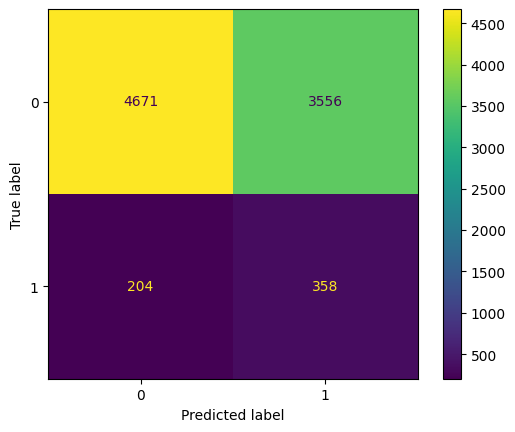

In [220]:
ConfusionMatrixDisplay.from_estimator(dtree, X_test, y_test)

In [221]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.57      0.71      8227
           1       0.09      0.64      0.16       562

    accuracy                           0.57      8789
   macro avg       0.52      0.60      0.44      8789
weighted avg       0.90      0.57      0.68      8789



In [222]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

In [223]:
rforest = RandomForestClassifier(random_state=101, oob_score=True)

In [ ]:
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [3, 4, 5],
              'min_samples_split': [20, 25],
              'min_samples_leaf' : [30, 35, 40]
             }
rforest_grid = GridSearchCV(rforest, cv=10, param_grid=param_grid, scoring='accuracy')
rforest_grid.fit(X_train,y_train)
print('Best Parameters using grid search: \n', rforest_grid.best_params_)

In [225]:
rforest.set_params(criterion = 'gini',
                  min_samples_leaf = 30,
                  min_samples_split = 20,
                  max_depth = 5,
                  n_estimators=300)

RandomForestClassifier(max_depth=5, min_samples_leaf=30, min_samples_split=20,
                       n_estimators=300, oob_score=True, random_state=101)

In [226]:
rforest.fit(x_tr_os, y_tr_os)

RandomForestClassifier(max_depth=5, min_samples_leaf=30, min_samples_split=20,
                       n_estimators=300, oob_score=True, random_state=101)

In [227]:
pred = rforest.predict(X_test)

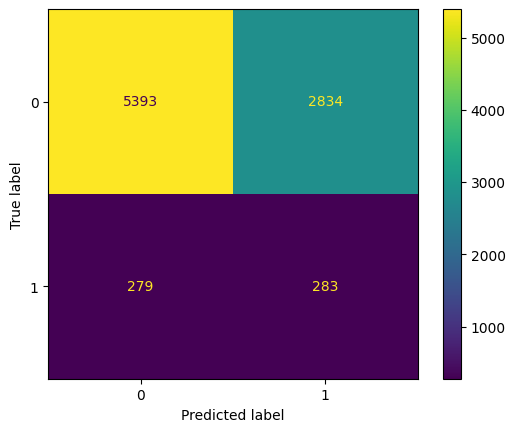

In [228]:
ConfusionMatrixDisplay.from_estimator(rforest, X_test, y_test)

In [229]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.66      0.78      8227
           1       0.09      0.50      0.15       562

    accuracy                           0.65      8789
   macro avg       0.52      0.58      0.46      8789
weighted avg       0.90      0.65      0.74      8789



In [ ]:
min_estimators = 15
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    rforest.set_params(n_estimators=i)
    rforest.fit(X_train, y_train)

    oob_error = 1 - rforest.oob_score_
    error_rate[i] = oob_error

In [ ]:
oob_series = pd.Series(error_rate)
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.xlim(0, 1000)
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

In [ ]:
from sklearn.svm import SVC

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [ ]:
svm_model = SVC(class_weight='balanced', random_state=101, C=1.0)

In [ ]:
param_grid = {'C': [1.0, 5.0, 10.0, 100.0],
              'kernel': ['rbf', 'linear']}

In [ ]:
svm_grid = GridSearchCV(svm_model, cv=10, param_grid=param_grid, scoring='f1')
svm_grid.fit(scaled_X_train, y_train)
print('Best Parameters using grid search: \n', svm_grid.best_params_)

In [ ]:
svm_model = svm_grid.best_estimator_

In [ ]:
svm_model.fit(scaled_X_train, y_tr_os)

In [ ]:
pred = svm_model.predict(scaled_X_test)

In [ ]:
ConfusionMatrixDisplay.from_estimator(svm_model, scaled_X_test, y_test)

In [230]:
import xgboost as xgb

In [231]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic', )

In [232]:
param_grid = {'max_depth': [3, 4, 5]}

In [233]:
xgb_grid_model = GridSearchCV(xgb_model, param_grid, scoring='f1', cv=10)

In [234]:
xgb_grid_model.fit(x_tr_os, y_tr_os)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'max_depth': [3, 4, 5]}, scoring='f1')

In [235]:
xgb_model = xgb_grid_model.best_estimator_

In [236]:
xgb_model.set_params(n_estimators = 300)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [237]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [238]:
pred = xgb_model.predict(X_test)

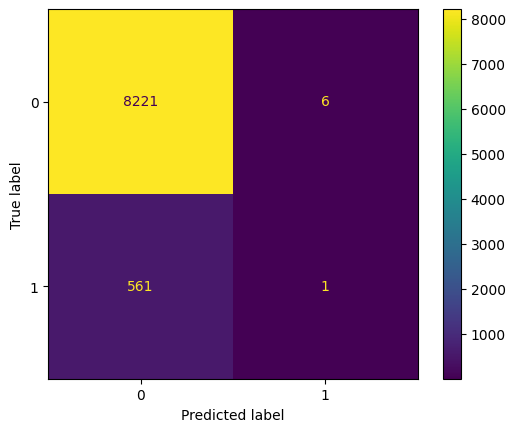

In [239]:
ConfusionMatrixDisplay.from_estimator(xgb_model, X_test, y_test)

In [240]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      8227
           1       0.14      0.00      0.00       562

    accuracy                           0.94      8789
   macro avg       0.54      0.50      0.49      8789
weighted avg       0.89      0.94      0.91      8789



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model = Sequential()

model.add(Dense(500, activation='relu',))
model.add(Dropout(0.4))

model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(125, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(60, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'AUC'])

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

In [ ]:
model.fit(x_tr_os, y_tr_os, validation_data=(X_test, y_test), batch_size=128, callbacks=[early_stop], validation_batch_size=128, epochs=150)

Epoch 1/150
729/729 [==============================] - 16s 19ms/step - loss: 3.3335 - accuracy: 0.4983 - auc: 0.4996 - val_loss: 0.7089 - val_accuracy: 0.0657 - val_auc: 0.4924
Epoch 2/150
729/729 [==============================] - 14s 19ms/step - loss: 0.7087 - accuracy: 0.4972 - auc: 0.4985 - val_loss: 0.6967 - val_accuracy: 0.0657 - val_auc: 0.5000
Epoch 3/150
729/729 [==============================] - 12s 17ms/step - loss: 0.6980 - accuracy: 0.4976 - auc: 0.4954 - val_loss: 0.6966 - val_accuracy: 0.0657 - val_auc: 0.5000
Epoch 4/150
729/729 [==============================] - 13s 18ms/step - loss: 0.6958 - accuracy: 0.4984 - auc: 0.5010 - val_loss: 0.6931 - val_accuracy: 0.9343 - val_auc: 0.5000
Epoch 5/150
729/729 [==============================] - 14s 19ms/step - loss: 0.6939 - accuracy: 0.5008 - auc: 0.5004 - val_loss: 0.6878 - val_accuracy: 0.9343 - val_auc: 0.5000
Epoch 6/150
729/729 [==============================] - 13s 17ms/step - loss: 0.6939 - accuracy: 0.4964 - auc: 0.499

In [ ]:
loss_df = pd.DataFrame(model.history.history)

<Axes: >

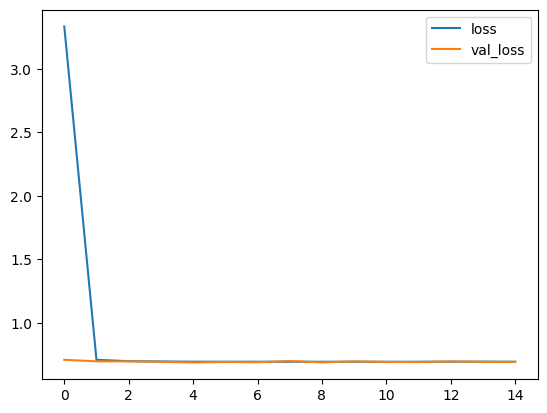

In [ ]:
loss_df[['loss', 'val_loss']].plot()

<Axes: >

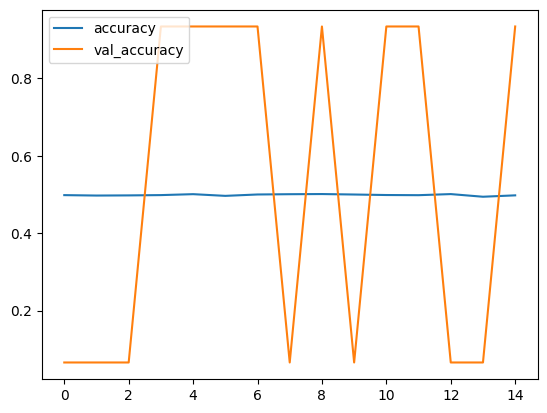

In [ ]:
loss_df[['accuracy', 'val_accuracy']].plot()

In [ ]:
y_pred = model.predict(X_test)

275/275 [==============================] - 1s 3ms/step


In [ ]:
pred = np.where(y_pred >= 0.50, 1, 0)

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97      8212
           1       0.00      0.00      0.00       577

    accuracy                           0.93      8789
   macro avg       0.47      0.50      0.48      8789
weighted avg       0.87      0.93      0.90      8789



In [ ]:
confusion_matrix(y_test, pred)

array([[8212,    0],
       [ 577,    0]])

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97      8212
           1       0.00      0.00      0.00       577

    accuracy                           0.93      8789
   macro avg       0.47      0.50      0.48      8789
weighted avg       0.87      0.93      0.90      8789



In [241]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [270]:
ada_model = AdaBoostClassifier()
gra_model = GradientBoostingClassifier()

In [243]:
ada_model.fit(x_tr_os, y_tr_os)

AdaBoostClassifier()

In [271]:
gra_model.fit(x_tr_os, y_tr_os)

GradientBoostingClassifier()

In [272]:
model = dump(gra_model, 'model.pkl')

In [273]:
!pip freeze> requirements.txt

In [245]:
pred = ada_model.predict(X_test)

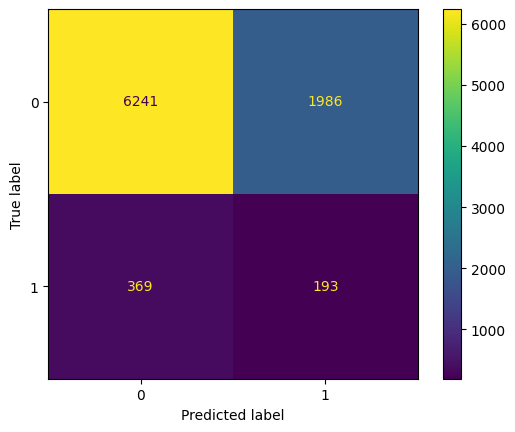

In [246]:
ConfusionMatrixDisplay.from_estimator(ada_model, X_test, y_test)

In [247]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.76      0.84      8227
           1       0.09      0.34      0.14       562

    accuracy                           0.73      8789
   macro avg       0.52      0.55      0.49      8789
weighted avg       0.89      0.73      0.80      8789



In [248]:
gra_pred = gra_model.predict(X_test)

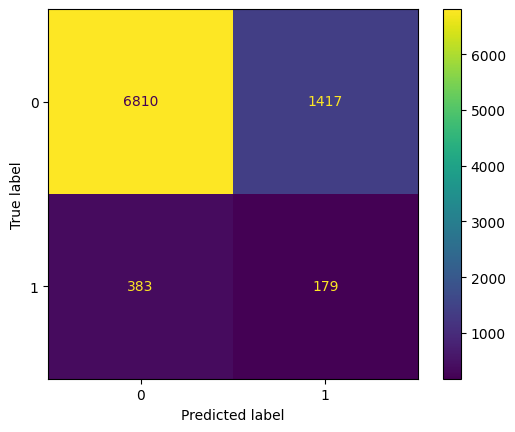

In [249]:
ConfusionMatrixDisplay.from_estimator(gra_model, X_test, y_test)

In [250]:
print(classification_report(y_test, gra_pred))

              precision    recall  f1-score   support

           0       0.95      0.83      0.88      8227
           1       0.11      0.32      0.17       562

    accuracy                           0.80      8789
   macro avg       0.53      0.57      0.52      8789
weighted avg       0.89      0.80      0.84      8789



In [68]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 6.7 MB/s eta 0:00:00


In [251]:
from catboost import CatBoostClassifier

In [252]:
clf = CatBoostClassifier(
    iterations=50,
    random_seed=42,
    learning_rate=0.5,
    custom_loss=['AUC', 'Accuracy']
)

clf.fit(
    x_tr_os, y_tr_os,
    eval_set=(X_test, y_test),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [253]:
pred = clf.predict(X_test)

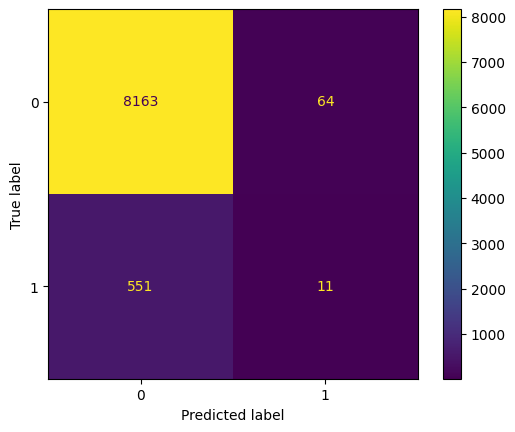

In [254]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

In [255]:
from sklearn.naive_bayes import MultinomialNB

In [256]:
naive_model = MultinomialNB()

In [257]:
naive_model.fit(x_tr_os, y_tr_os)

MultinomialNB()

In [258]:
naive_predict = naive_model.predict(X_test)

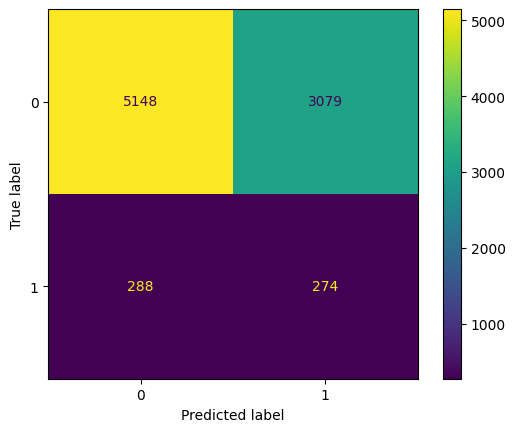

In [259]:
ConfusionMatrixDisplay.from_estimator(naive_model, X_test, y_test)

In [260]:
print(classification_report(y_test, naive_predict))

              precision    recall  f1-score   support

           0       0.95      0.63      0.75      8227
           1       0.08      0.49      0.14       562

    accuracy                           0.62      8789
   macro avg       0.51      0.56      0.45      8789
weighted avg       0.89      0.62      0.71      8789



In [135]:
import lightgbm as lgb

In [137]:
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

LGBMClassifier()

In [138]:
light_gbm_predict = clf.predict(X_test)

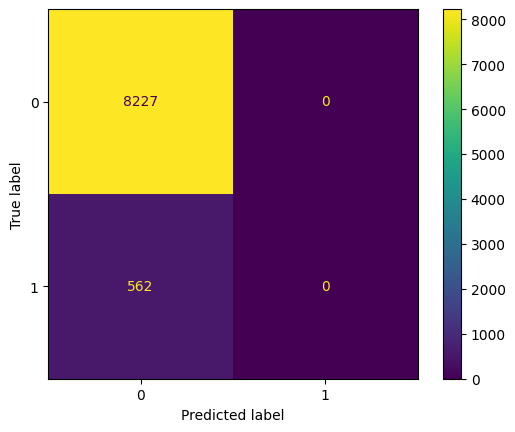

In [139]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

In [83]:
print(classification_report(y_test, light_gbm_predict))

              precision    recall  f1-score   support

           0       0.95      0.61      0.74      8212
           1       0.08      0.52      0.14       577

    accuracy                           0.60      8789
   macro avg       0.52      0.56      0.44      8789
weighted avg       0.89      0.60      0.70      8789



In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [261]:
df_sample = pd.read_csv('/content/drive/MyDrive/BFSI/Insurance_test.csv')

In [262]:
df_sample.head()

policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0   ID58593       0.341732        0.00             0.586538           C3   
1   ID58594       0.307241        0.13             0.442308           C8   
2   ID58595       0.327924        0.12             0.451923           C8   
3   ID58596       0.782654        0.01             0.461538           C5   
4   ID58597       1.233404        0.02             0.634615           C5   

   population_density  make segment model fuel_type     max_torque  \
0                4076     1       A    M1       CNG   60Nm@3500rpm   
1                8794     1      B2    M6    Petrol  113Nm@4400rpm   
2                8794     2       A    M3    Petrol   91Nm@4250rpm   
3               34738     1       A    M1       CNG   60Nm@3500rpm   
4               34738     1       A    M1       CNG   60Nm@3500rpm   

          max_power        engine_type  airbags is_esc is_adjustable_steering  \
0  40.36bhp@6000rpm  F8D Petrol Engine        2     No                     No   
1  88.50bhp@6000rpm  K Series Dual jet        2     No                    Yes   
2  67.06bhp@5500rpm            1.0 SCe        2     No                     No   
3  40.36bhp@6000rpm  F8D Petrol Engine        2     No                     No   
4  40.36bhp@6000rpm  F8D Petrol Engine        2     No                     No   

  is_tpms is_parking_sensors is_parking_camera rear_brakes_type  displacement  \
0      No                Yes                No             Drum           796   
1      No                Yes                No             Drum          1197   
2      No                 No               Yes             Drum           999   
3      No                Yes                No             Drum           796   
4      No                Yes                No             Drum           796   

   cylinder transmission_type  gear_box steering_type  turning_radius  length  \
0         3            Manual         5         Power             4.6    3445   
1         4            Manual         5      Electric             4.8    3845   
2         3         Automatic         5      Electric             5.0    3731   
3         3            Manual         5         Power             4.6    3445   
4         3            Manual         5         Power             4.6    3445   

   width  height  gross_weight is_front_fog_lights is_rear_window_wiper  \
0   1515    1475          1185                  No                   No   
1   1735    1530          1335                 Yes                   No   
2   1579    1490          1155                  No                   No   
3   1515    1475          1185                  No                   No   
4   1515    1475          1185                  No                   No   

  is_rear_window_washer is_rear_window_defogger is_brake_assist  \
0                    No                      No              No   
1                    No                      No             Yes   
2                    No                      No              No   
3                    No                      No              No   
4                    No                      No              No   

  is_power_door_locks is_central_locking is_power_steering  \
0                  No                 No               Yes   
1                 Yes                Yes               Yes   
2                 Yes                Yes               Yes   
3                  No                 No               Yes   
4                  No                 No               Yes   

  is_driver_seat_height_adjustable is_day_night_rear_view_mirror is_ecw  \
0                               No                            No     No   
1                              Yes                           Yes    Yes   
2                               No                           Yes    Yes   
3                               No                            No     No   
4                               No                           

In [263]:
X_train.columns

Index(['policy_tenure_rank', 'age_of_car_rank', 'age_of_policyholder_rank',
       'population_density_rank', 'area_cluster_C10', 'area_cluster_C11',
       'area_cluster_C12', 'area_cluster_C13', 'area_cluster_C14',
       'area_cluster_C15',
       ...
       'volume_8777961010', 'volume_9892640625', 'volume_9917842500',
       'volume_10164059025', 'volume_10206744750', 'volume_10443825000',
       'volume_10500957375', 'volume_10664731350', 'volume_11613504738',
       'volume_12584595000'],
      dtype='object', length=146)

In [ ]:
def data_preprocessor(df):

    df["max_torque_Nm"] = df["max_torque"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*Nm)").astype('float64')
    df["max_torque_rpm"] = df["max_torque"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*rpm)").astype('float64')

    df["max_power_bhp"] = df["max_power"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*bhp)").astype('float64')
    df["max_power_rpm"] = df["max_power"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*rpm)").astype('float64')

    df.drop(["max_torque","max_power"],axis=1,inplace=True)
    return df

data_preprocessor(df_sample)
df_sample['volume'] = df_sample['length'] * df_sample['width'] * df_sample['height']
df_sample.drop(['length', 'width', 'height'], axis=1, inplace=True)
X = df_sample.drop(['policy_id'],axis=1)
num = X[['age_of_car', 'age_of_policyholder', 'population_density']]
num_binned = pd.DataFrame(kbin.transform(num), index=num.index, columns=num.columns,).add_suffix('_rank')
X.drop(['age_of_car',	'age_of_policyholder',	'population_density'], axis=1, inplace=True)
X['make']=X['make'].astype('object')
X['airbags']=X['airbags'].astype('object')
X['displacement']=X['displacement'].astype('object')
X['cylinder']=X['cylinder'].astype('object')
X['gear_box']=X['gear_box'].astype('object')
X['turning_radius']=X['turning_radius'].astype('object')
X['gross_weight']=char['gross_weight'].astype('object')
X['ncap_rating']=char['ncap_rating'].astype('object')
X['max_torque_Nm']=char['max_torque_Nm'].astype('object')
X['max_torque_rpm']=char['max_torque_rpm'].astype('object')
X['max_power_bhp']=char['max_power_bhp'].astype('object')
X['max_power_rpm']=char['max_power_rpm'].astype('object')
X['volume']=char['volume'].astype('object')
X = pd.get_dummies(X,)
X_all = pd.concat([num_binned, X], axis=1, join="inner")
X_all = X_all.reindex(columns = X_train.columns, fill_value=0)

In [ ]:
num = X[['age_of_car', 'age_of_policyholder', 'population_density']]

In [ ]:
num_binned = pd.DataFrame(kbin.transform(num), index=num.index, columns=num.columns,).add_suffix('_rank')

In [ ]:
num_binned

age_of_car_rank  age_of_policyholder_rank  population_density_rank
0                  0.0                       8.0                      1.0
1                  8.0                       4.0                      4.0
2                  8.0                       5.0                      4.0
3                  1.0                       5.0                      7.0
4                  2.0                       8.0                      7.0
...                ...                       ...                      ...
39058              9.0                       9.0                      6.0
39059              4.0                       6.0                      4.0
39060              8.0                       2.0                      4.0
39061              6.0                       9.0                      7.0
39062              8.0                       0.0                      4.0

[39063 rows x 3 columns]

In [ ]:
X.drop(['age_of_car',	'age_of_policyholder',	'population_density'], axis=1, inplace=True)

In [ ]:
X['make']=X['make'].astype('object')
X['airbags']=X['airbags'].astype('object')
X['displacement']=X['displacement'].astype('object')
X['cylinder']=X['cylinder'].astype('object')
X['gear_box']=X['gear_box'].astype('object')
X['turning_radius']=X['turning_radius'].astype('object')
X['length']=X['length'].astype('object')
X['width']=X['width'].astype('object')
X['height']=X['height'].astype('object')
X['gross_weight']=X['gross_weight'].astype('object')
X['ncap_rating']=X['ncap_rating'].astype('object')

In [266]:
x_tr_os.columns

Index(['policy_tenure_rank', 'age_of_car_rank', 'age_of_policyholder_rank',
       'population_density_rank', 'area_cluster_C10', 'area_cluster_C11',
       'area_cluster_C12', 'area_cluster_C13', 'area_cluster_C14',
       'area_cluster_C15',
       ...
       'volume_8777961010', 'volume_9892640625', 'volume_9917842500',
       'volume_10164059025', 'volume_10206744750', 'volume_10443825000',
       'volume_10500957375', 'volume_10664731350', 'volume_11613504738',
       'volume_12584595000'],
      dtype='object', length=146)

In [277]:
from joblib import dump, load
kbin = dump(kbin, 'kbin.pkl')
column_names = dump(x_tr_os.columns, 'column_names.pkl')

In [269]:
model = dump(gra_model, 'model.pkl')

In [ ]:
X = pd.get_dummies(X,)
X_all = pd.concat([num_binned, X], axis=1, join="inner")
X_all = X_all.reindex(columns = X_train.columns, fill_value=0)

In [ ]:
X_all = pd.concat([num_binned, X], axis=1, join="inner")

In [ ]:
X_all = X_all.reindex(columns = X_train.columns, fill_value=0)

In [ ]:
df_test['is_claim'] = gra_model.predict(X_all)

In [ ]:
df_test

policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0       ID58593       0.341732        0.00             0.586538           C3   
1       ID58594       0.307241        0.13             0.442308           C8   
2       ID58595       0.327924        0.12             0.451923           C8   
3       ID58596       0.782654        0.01             0.461538           C5   
4       ID58597       1.233404        0.02             0.634615           C5   
...         ...            ...         ...                  ...          ...   
39058   ID97651       0.047982        0.15             0.740385           C2   
39059   ID97652       1.224838        0.05             0.509615           C8   
39060   ID97653       0.520287        0.12             0.355769           C6   
39061   ID97654       1.172391        0.08             0.644231           C5   
39062   ID97655       0.094030        0.12             0.307692           C8   

       population_density  make segment model fuel_type     max_torque  \
0                    4076     1       A    M1       CNG   60Nm@3500rpm   
1                    8794     1      B2    M6    Petrol  113Nm@4400rpm   
2                    8794     2       A    M3    Petrol   91Nm@4250rpm   
3                   34738     1       A    M1       CNG   60Nm@3500rpm   
4                   34738     1       A    M1       CNG   60Nm@3500rpm   
...                   ...   ...     ...   ...       ...            ...   
39058               27003     1      B2    M6    Petrol  113Nm@4400rpm   
39059                8794     3      C2    M4    Diesel  250Nm@2750rpm   
39060               13051     1      B2    M7    Petrol  113Nm@4400rpm   
39061               34738     1      C1    M2    Petrol  113Nm@4400rpm   
39062                8794     3      C2    M4    Diesel  250Nm@2750rpm   

               max_power            engine_type  airbags is_esc  \
0       40.36bhp@6000rpm      F8D Petrol Engine        2     No   
1       88.50bhp@6000rpm      K Series Dual jet        2     No   
2       67.06bhp@5500rpm                1.0 SCe        2     No   
3       40.36bhp@6000rpm      F8D Petrol Engine        2     No   
4       40.36bhp@6000rpm      F8D Petrol Engine        2     No   
...                  ...                    ...      ...    ...   
39058   88.50bhp@6000rpm      K Series Dual jet        2     No   
39059  113.45bhp@4000rpm          1.5 L U2 CRDi        6    Yes   
39060   88.50bhp@6000rpm  1.2 L K Series Engine        6    Yes   
39061   88.50bhp@6000rpm     1.2 L K12N Dualjet        2    Yes   
39062  113.45bhp@4000rpm          1.5 L U2 CRDi        6    Yes   

      is_adjustable_steering is_tpms is_parking_sensors is_parking_camera  \
0                         No      No                Yes                No   
1                        Yes      No                Yes                No   
2                         No      No                 No               Yes   
3                         No      No                Yes                No   
4                         No      No                Yes                No   
...                      ...     ...                ...               ...   
39058                    Yes      No                Yes                No   
39059                    Yes     Yes                Yes               Yes   
39060                    Yes      No                Yes               Yes   
39061                    Yes      No                Yes               Yes   
39062                    Yes     Yes                Yes               Yes   

      rear_brakes_type  displacement  cylinder transmission_type  gear_box  \
0                 Drum           796         3            Manual         5   
1                 Drum          1197         4            Manual         5   
2                 Drum           999         3         Automatic         5   
3                 Drum           796         3            Manual         5   
4                 Drum           796

In [ ]:
df_test[['policy_id', 'is_claim']].to_csv('submissions.csv', index=False)